<a href="https://colab.research.google.com/github/Apaulgithub/Cardiovascular_Risk_Prediction/blob/main/ML_Cardiovascular_Risk_Prediction_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member Name -** Dhirendra Yadav

# Project Summary 

The goal of this project was to use machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provided information on over 4,000 patients and included 15 attributes, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors.

To prepare the data for analysis, extensive preprocessing was performed to clean and transform the data. This included handling missing values using median, mode, and KNN imputation techniques, as well as identifying and removing outliers using the Interquartile Range (IQR) method. Skewed continuous variables were also transformed using log and square root transformations to reduce skewness and improve model performance.

Feature selection was performed using variance inflation factor to remove multicollinearity and a new feature called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. Redundant columns were also removed to simplify the dataset. The most important features for predicting CHD risk were identified as ‘age’, ‘sex’, ‘education’, ‘cigs_per_day’, ‘bp_meds’, ‘prevalent_stroke’, ‘prevalent_hyp’, ‘diabetes’, ‘total_cholesterol’, ‘bmi’, ‘heart_rate’, ‘glucose’, and ‘pulse_pressure’.

To handle the imbalanced nature of the dataset, the SMOTE combined with Tomek links undersampling technique was used to balance the class distribution and improve model performance. The data was also scaled using standard scalar method to ensure that all features were on the same scale.

Several machine learning models were evaluated on their performance on the primary evaluation metric of recall. After careful analysis, the Neural Network (tuned) was chosen as the final prediction model because it had the highest recall score among the models evaluated. By selecting a model with a high recall score, the goal was to correctly identify as many patients with CHD risk as possible, even if it meant having some false positives.

Overall, this project demonstrated the potential of machine learning techniques to accurately predict CHD risk in patients using data from a cardiovascular study. By carefully preprocessing and transforming the data, selecting relevant features, and choosing an appropriate model based on its performance on a relevant evaluation metric, it was possible to achieve a positive business impact by accurately predicting CHD risk in patients.

## ***1. Know Your Data***

### Import Libraries

In [277]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [278]:
data = pd.read_csv('data_cardiovascular_risk.csv')

### Dataset First View

In [279]:
data.shape

(3390, 17)

In [280]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [281]:
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [282]:
data.drop(columns=['id'], inplace=True)

### Dataset Rows & Columns count

In [283]:
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  3390
Number of columns are:  16


### Dataset Information

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Duplicate Values

In [285]:
data.duplicated().sum()

0

#### Missing Values/Null Values

In [286]:
data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

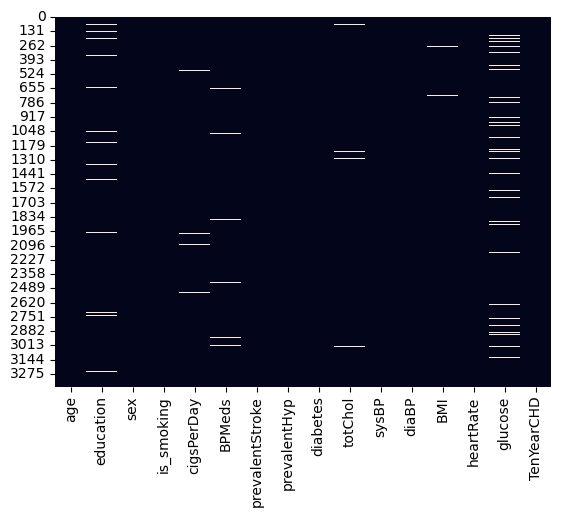

In [287]:
sns.heatmap(data.isnull(), cbar=False)

## ***2. Understanding Your Variables***

In [288]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [289]:
data.describe(include= 'all').round(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3303.00,3390,3390,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.54,1.97,NaN,NaN,9.07,0.03,0.01,0.32,0.03,237.07,132.60,82.88,25.79,75.98,82.09,0.15
std,8.59,1.02,NaN,NaN,11.88,0.17,0.08,0.46,0.16,45.25,22.29,12.02,4.12,11.97,24.24,0.36
min,32.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,42.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.02,68.00,71.00,0.00
50%,49.00,2.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,56.00,3.00,NaN,NaN,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00


### Check Unique Values for each variable.

In [290]:
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [291]:
data_2 = data.copy()

In [292]:
data_2.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [293]:
dependent_var = ['ten_year_chd']

categorical_var = [i for i in data_2.columns if data_2[i].nunique()<=4]
continuous_var = [i for i in data_2.columns if i not in categorical_var]

In [294]:
categorical_var

['education',
 'sex',
 'is_smoking',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [295]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Dependent variable Distribution

ten_year_chd
0    2879
1     511
Name: count, dtype: int64
 


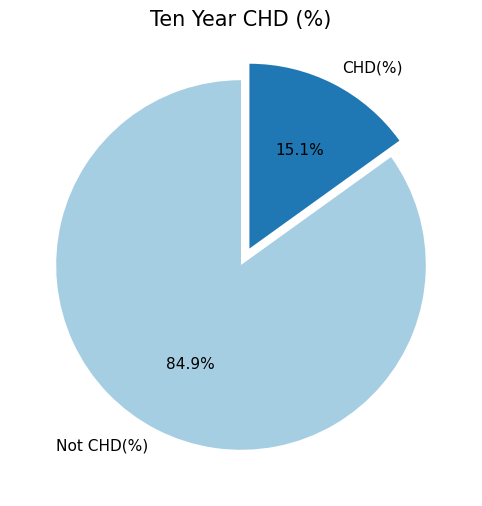

In [296]:
print(data_2.ten_year_chd.value_counts())
print(" ")


colors = sns.color_palette("Paired")


plt.figure(figsize=(10,6))
explode = [0,0.1]
textprops = {'fontsize':11}
plt.pie(data_2['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=15)

plt.show()

#### Chart - 2 : Distribution/ Box plot

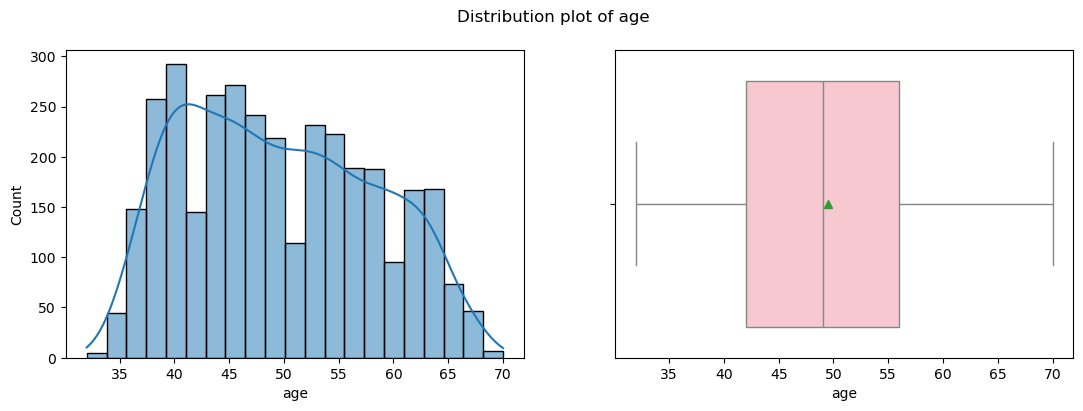

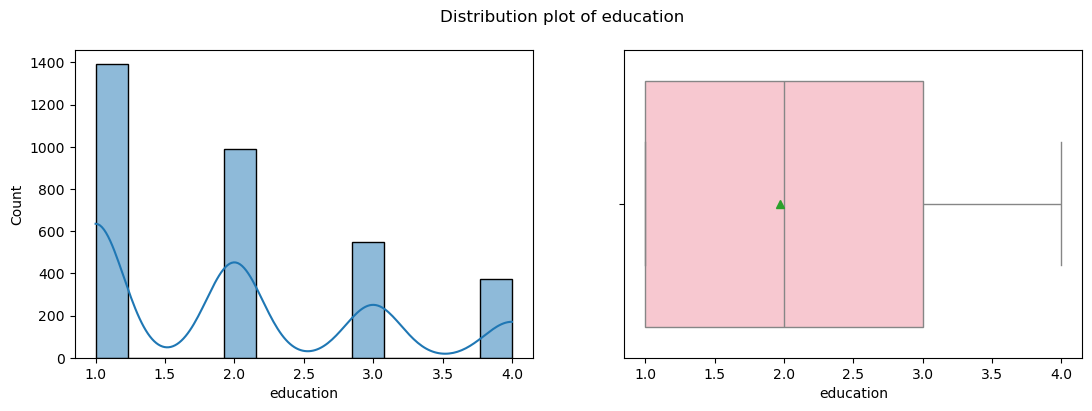

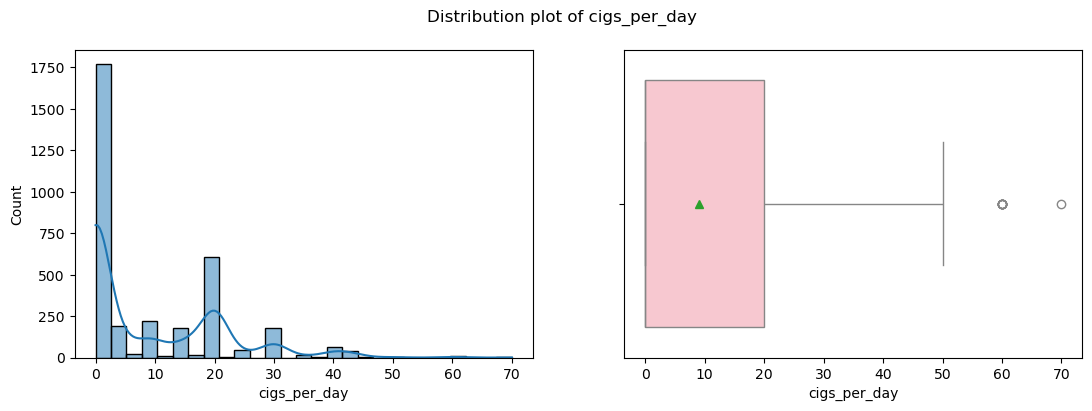

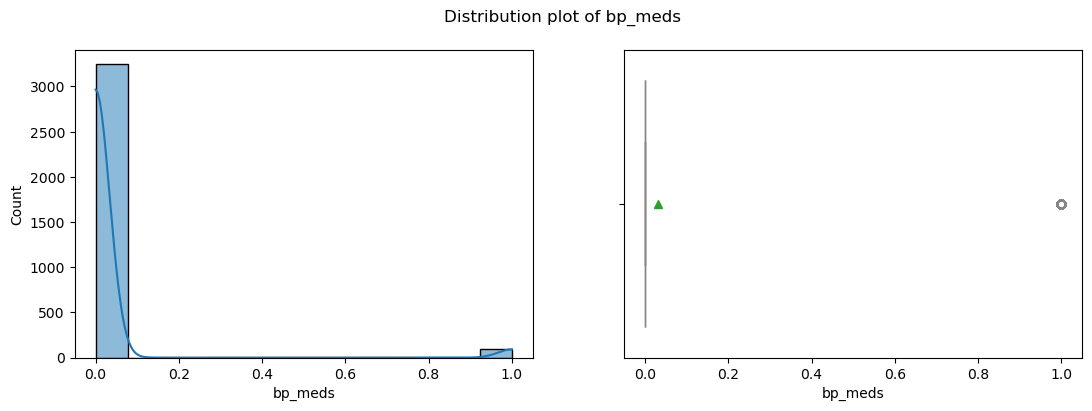

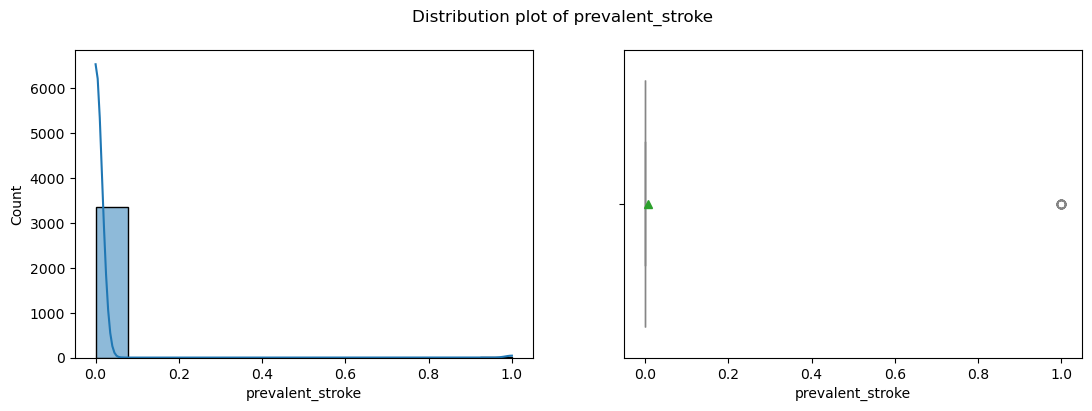

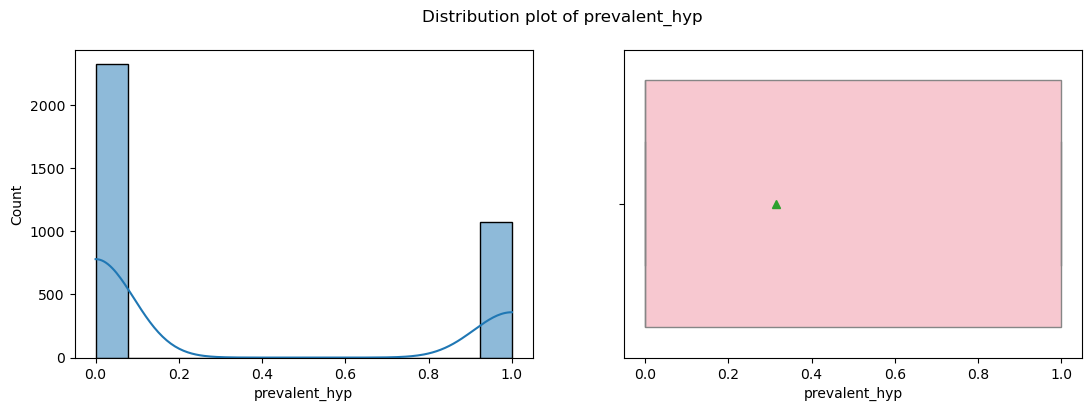

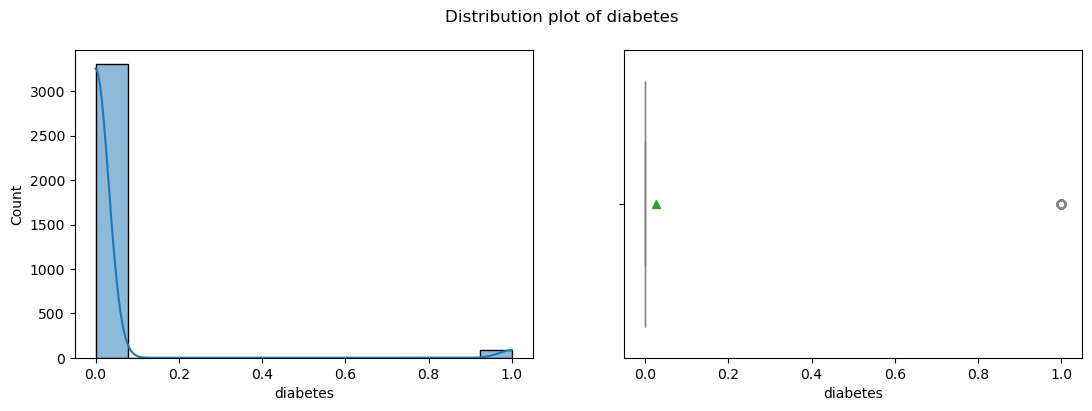

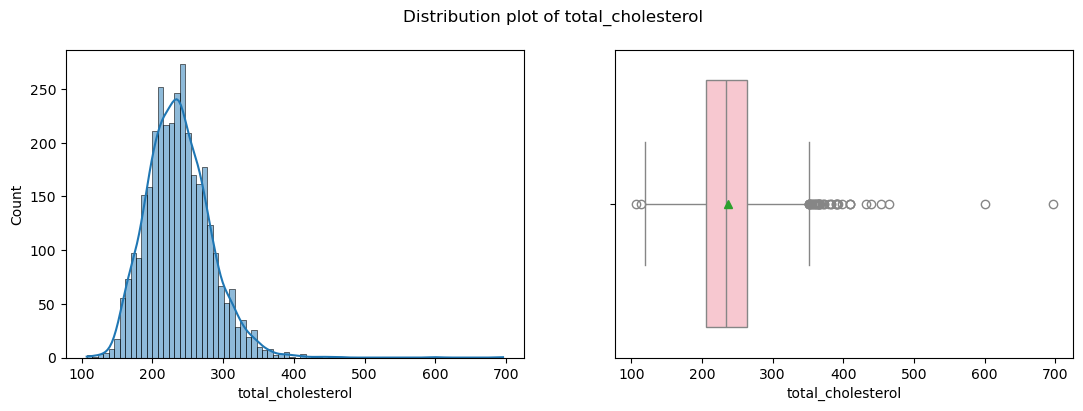

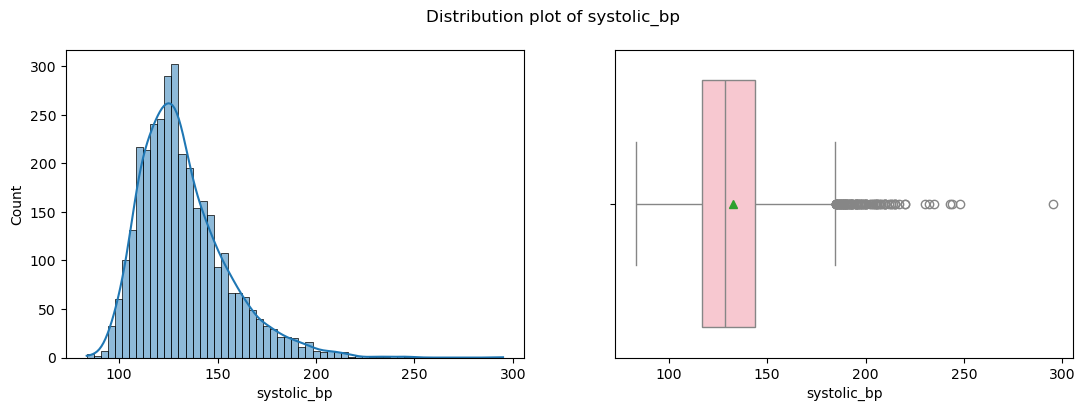

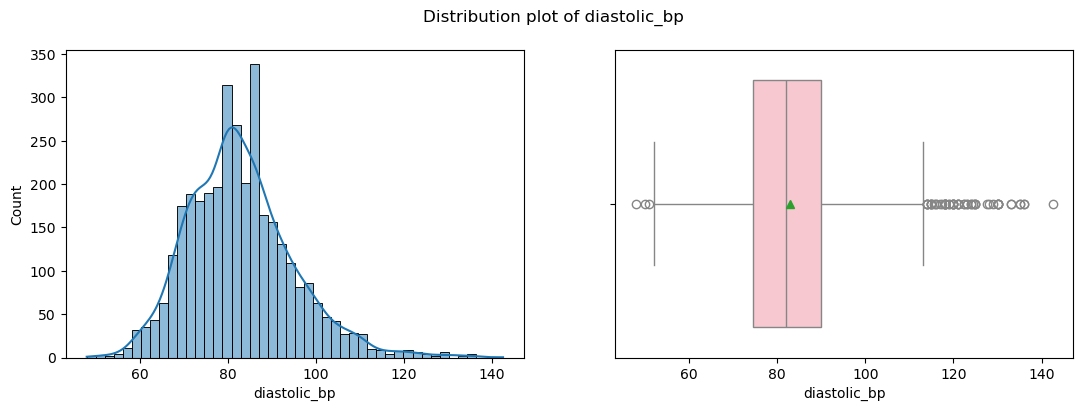

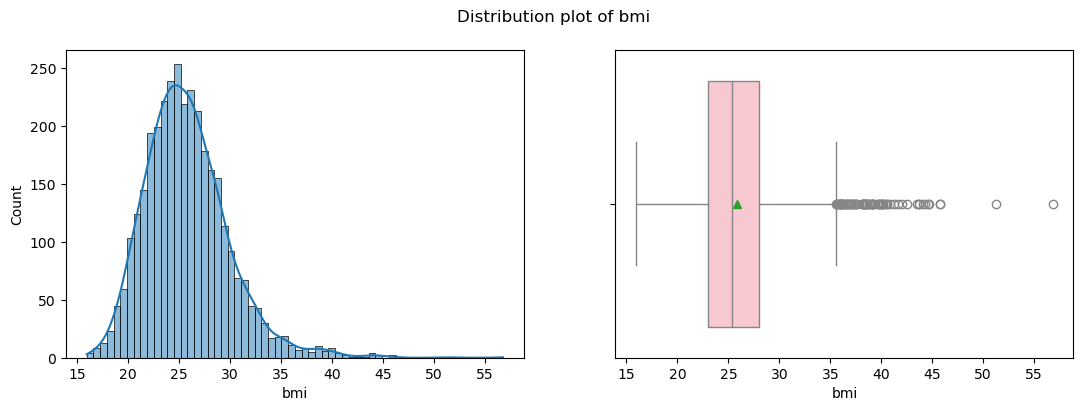

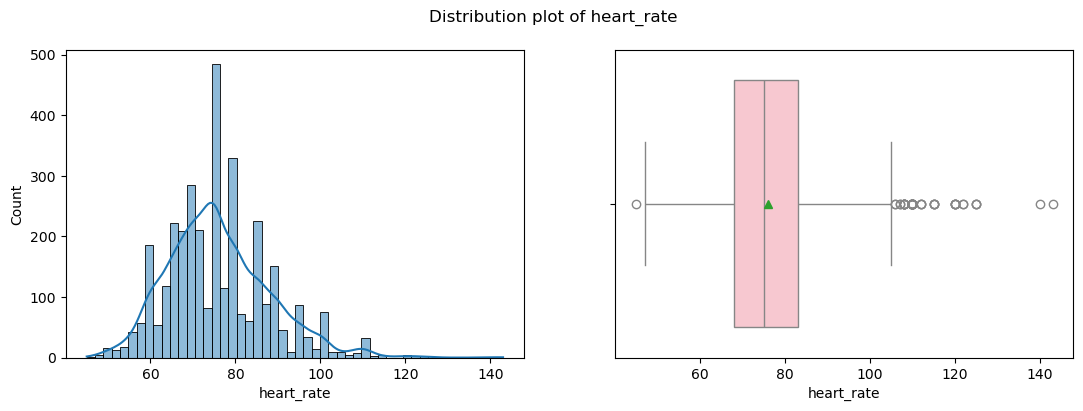

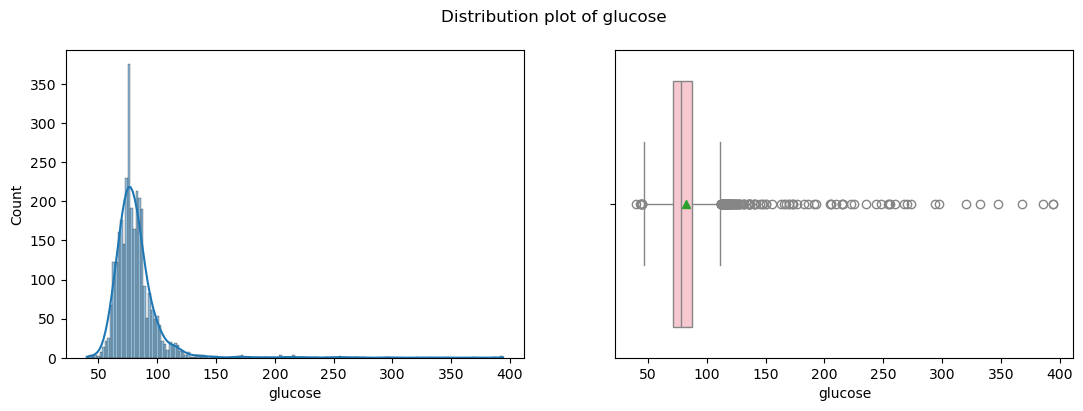

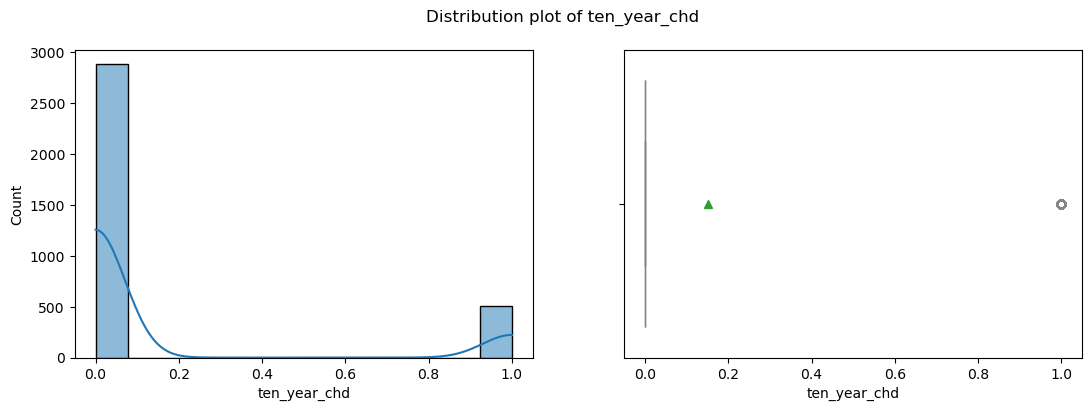

In [297]:
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()

#### Chart - 3 : Categorical variable Distribution

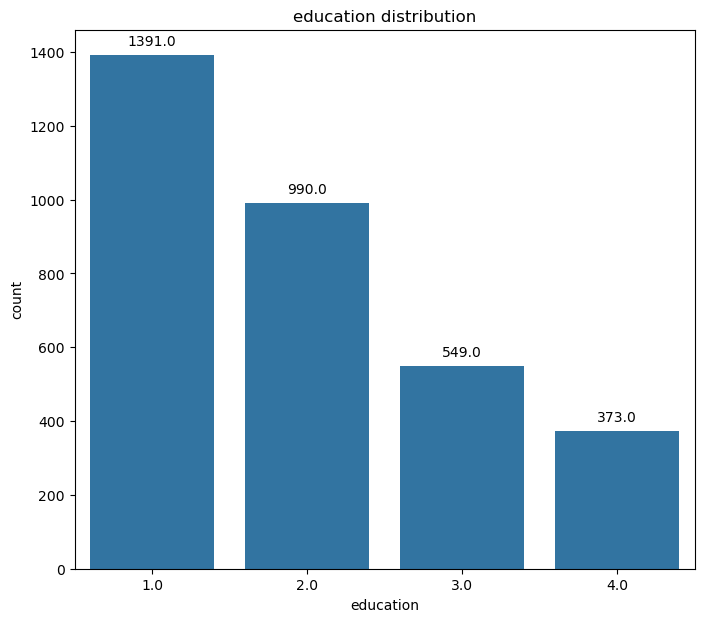

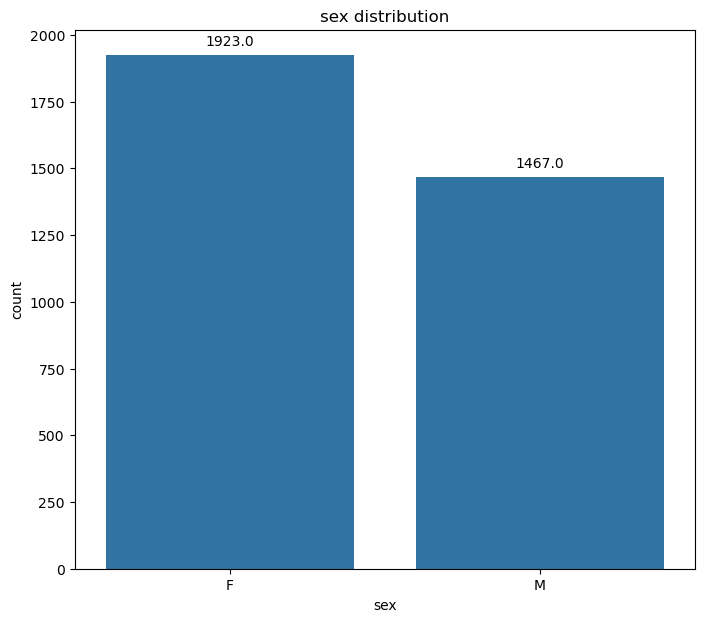

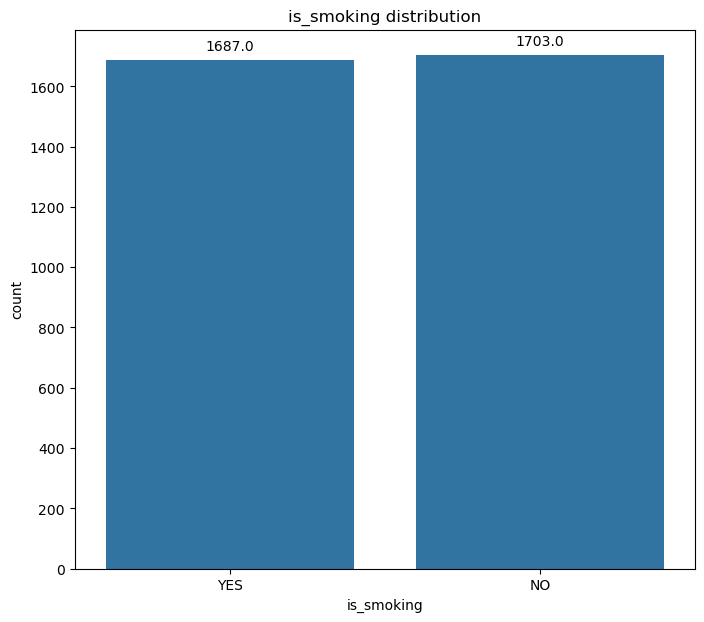

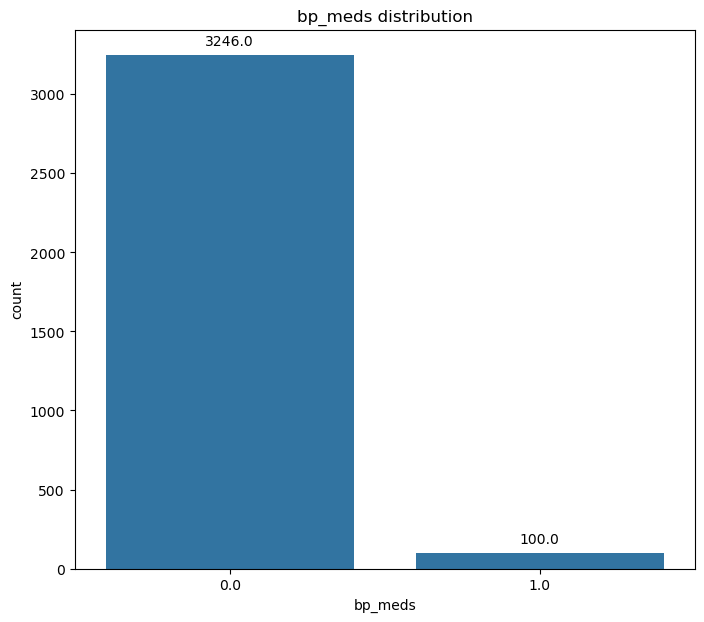

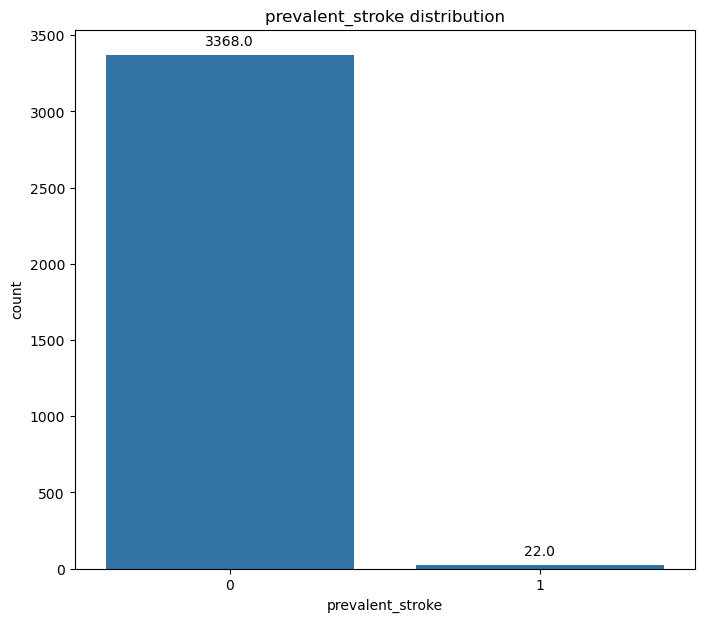

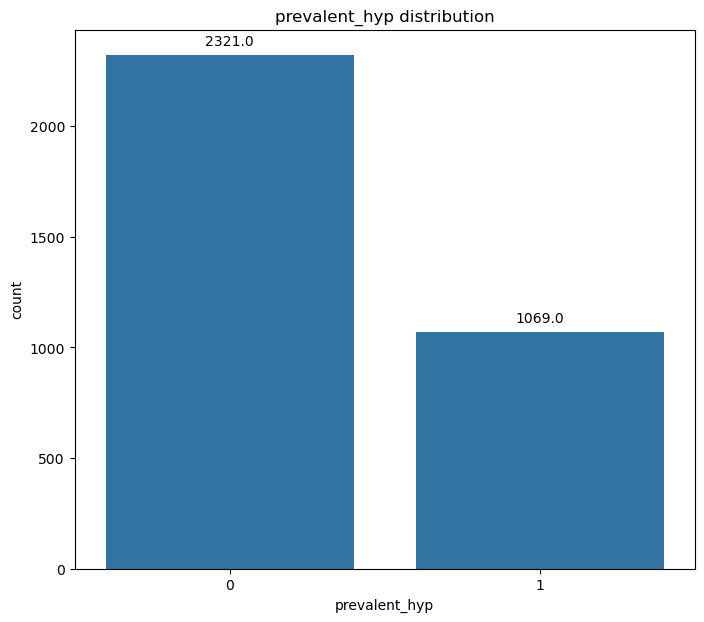

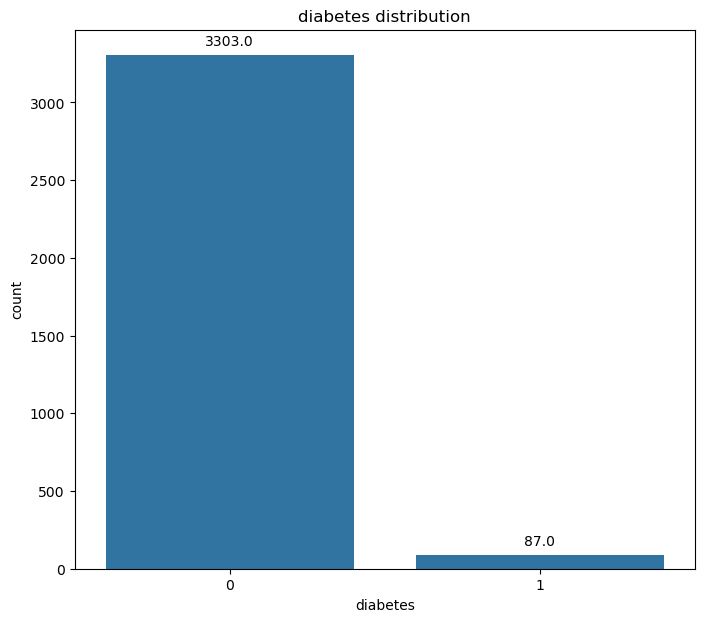

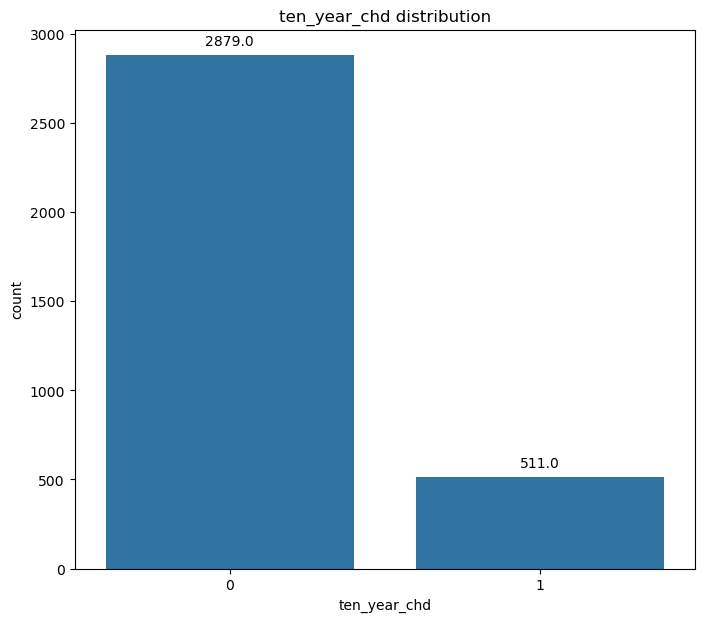

In [298]:
for i in categorical_var:
  plt.figure(figsize=(8,7))
  p = sns.countplot(x=i, data = data_2)
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

#### Chart - 4 : Dependent variable with continuous variables (Bivariate)

<Figure size 1000x500 with 0 Axes>

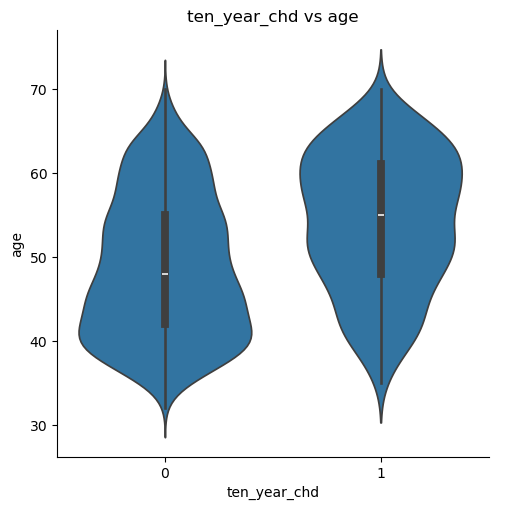

<Figure size 1000x500 with 0 Axes>

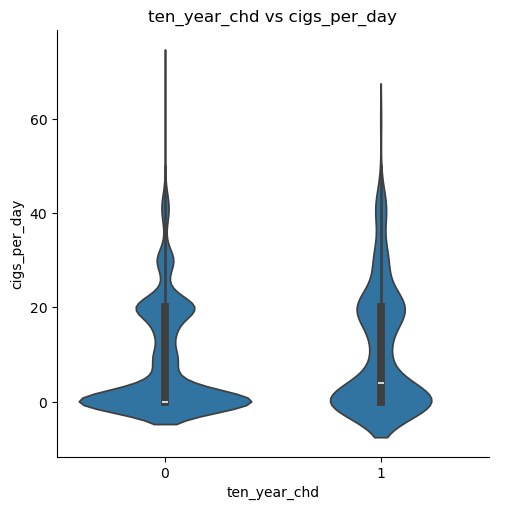

<Figure size 1000x500 with 0 Axes>

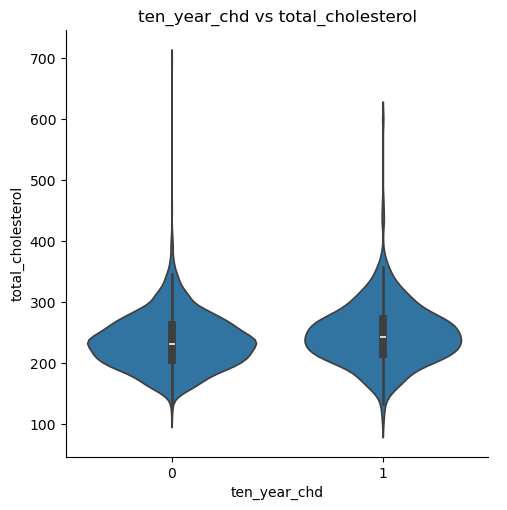

<Figure size 1000x500 with 0 Axes>

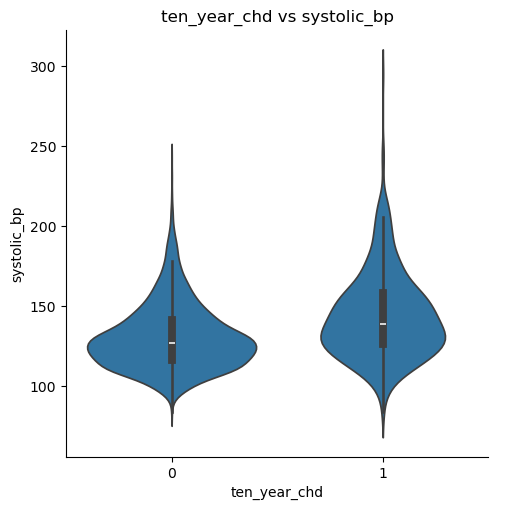

<Figure size 1000x500 with 0 Axes>

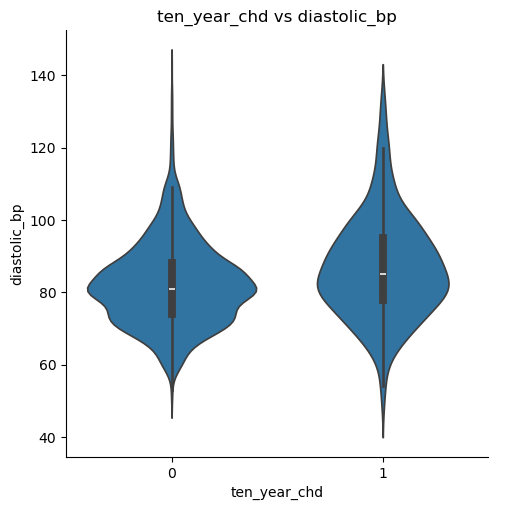

<Figure size 1000x500 with 0 Axes>

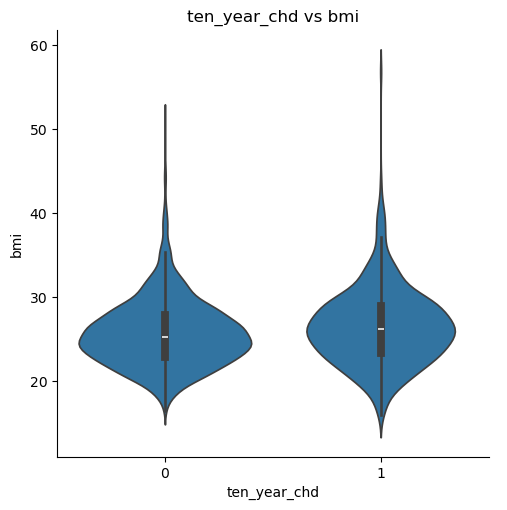

<Figure size 1000x500 with 0 Axes>

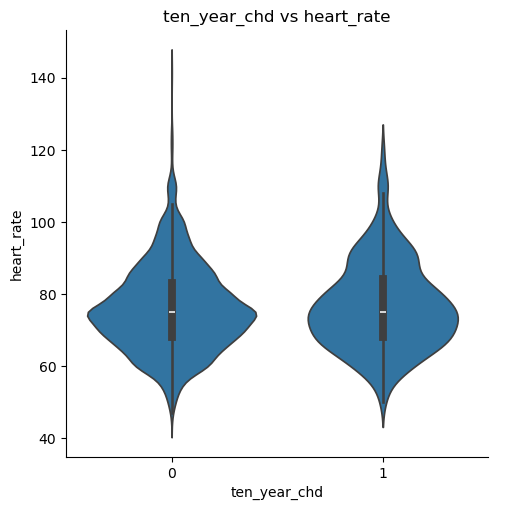

<Figure size 1000x500 with 0 Axes>

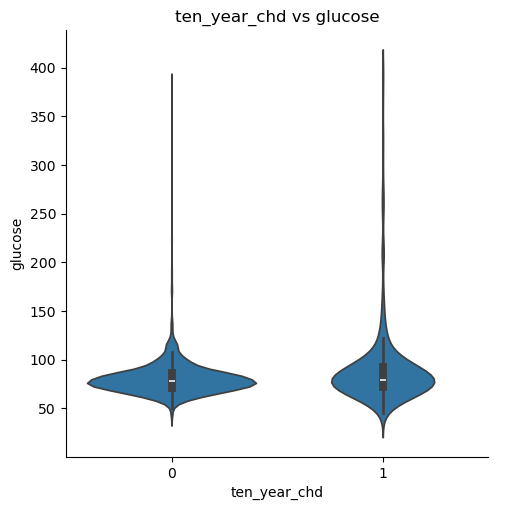

In [299]:
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=data_2,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

#### Chart - 5 : Dependent variable with categorical variables (Bivariate)

<Figure size 1000x500 with 0 Axes>

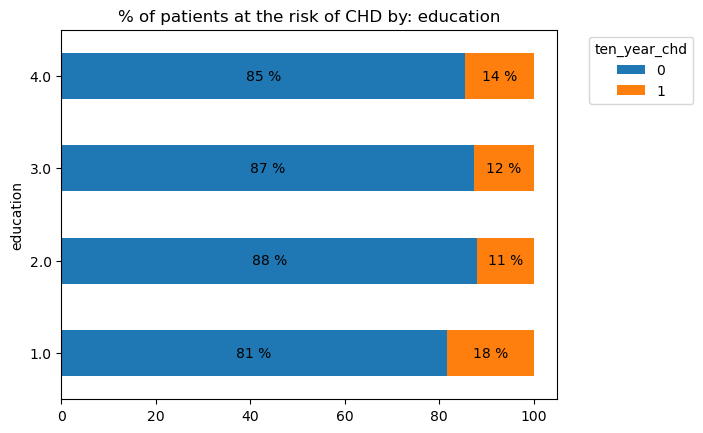

<Figure size 1000x500 with 0 Axes>

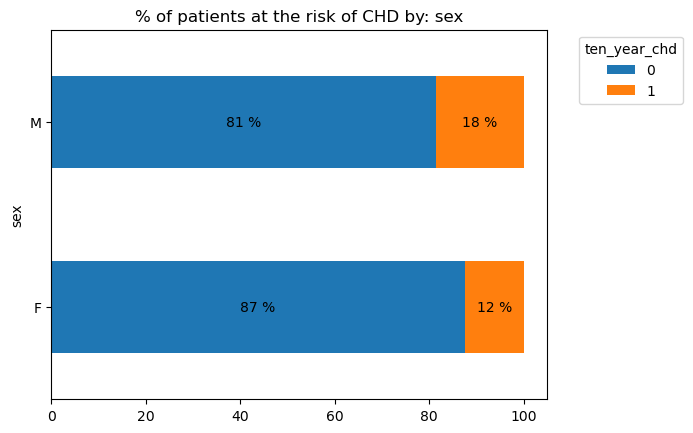

<Figure size 1000x500 with 0 Axes>

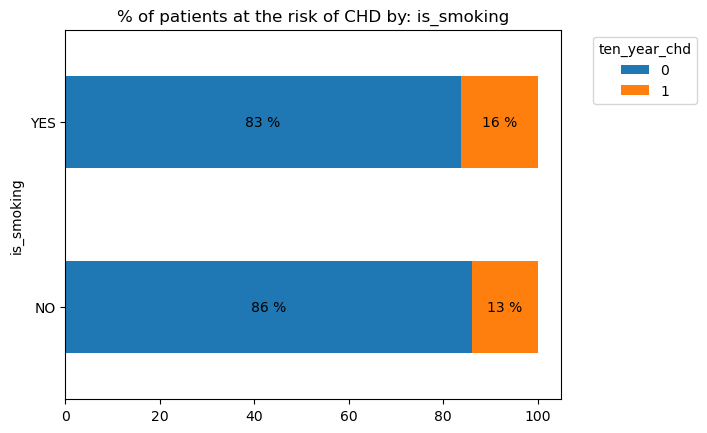

<Figure size 1000x500 with 0 Axes>

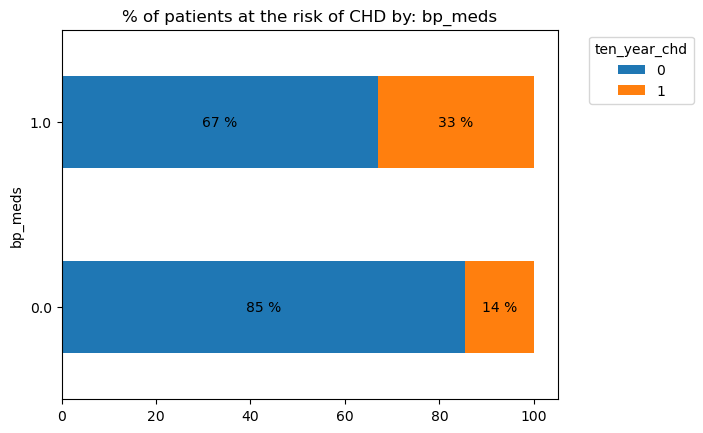

<Figure size 1000x500 with 0 Axes>

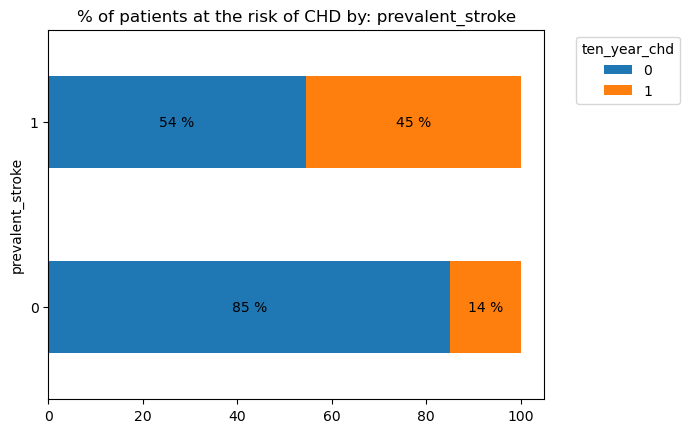

<Figure size 1000x500 with 0 Axes>

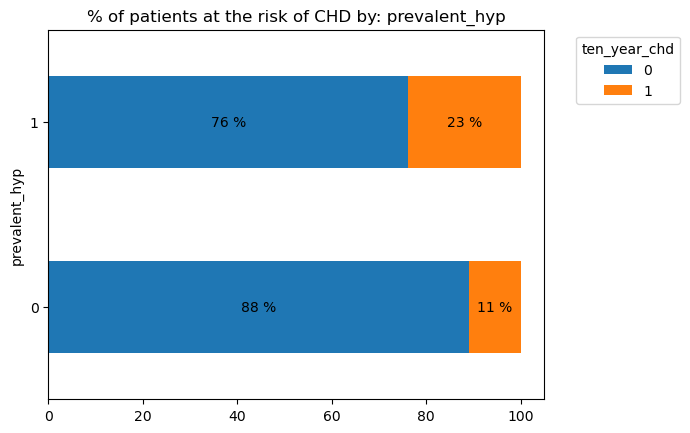

<Figure size 1000x500 with 0 Axes>

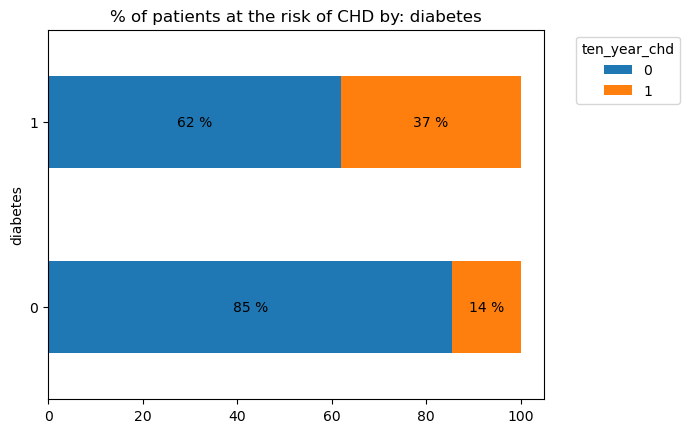

In [300]:
for i in categorical_var[:-1]:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = data_2.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

#### Chart - 6 : Ten Year CHD For Different Age Group

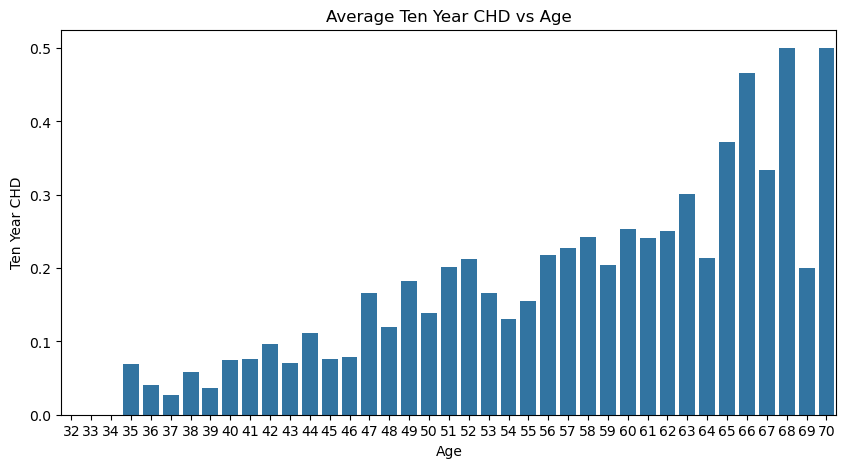

In [301]:
avg_CHD = data_2.groupby('age')['ten_year_chd'].mean().reset_index()

# Plot average CHD over different age
plt.figure(figsize=(10,5))
ax = sns.barplot(x= avg_CHD['age'], y= avg_CHD['ten_year_chd'])
ax.set_ylabel("Ten Year CHD")
ax.set_xlabel("Age")
ax.set_title('Average Ten Year CHD vs Age')
plt.show()

#### Chart - 7 : Percentage of Gender Distribution

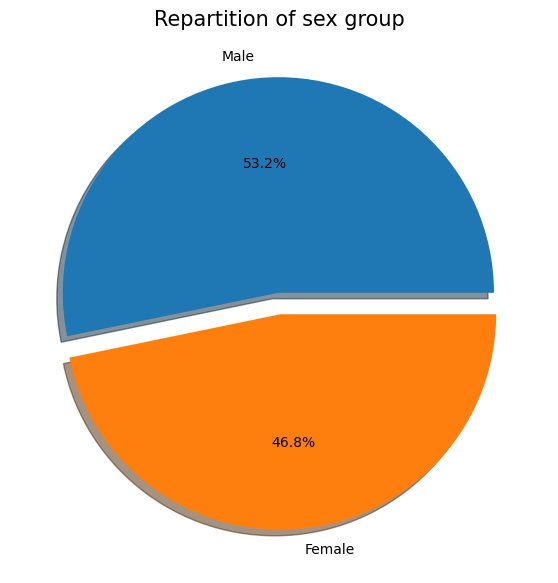

In [302]:
Male=data_2[data_2["sex"]=='M'].sum()
Female=data_2[data_2["sex"]=='F'].sum()

# Set labels
Sex_grp={"Male":Male["ten_year_chd"],"Female":Female["ten_year_chd"]}
plt.gcf().set_size_inches(7,7)
plt.pie(Sex_grp.values(),labels=Sex_grp.keys(), explode=[0.05, 0.05], autopct ='%1.1f%%', shadow = True);
plt.title("Repartition of sex group", fontsize=15)
plt.show()

#### Chart - 8 : CHD for smoking cigarette

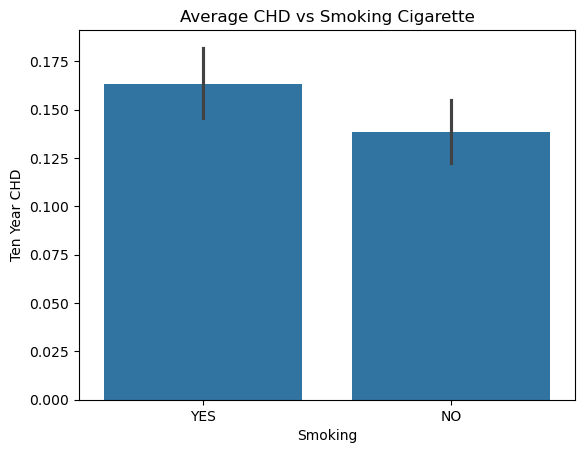

In [303]:
sns.barplot(x='is_smoking',y='ten_year_chd',data=data_2)
plt.ylabel("Ten Year CHD")
plt.xlabel("Smoking")
plt.title('Average CHD vs Smoking Cigarette')
plt.show()

#### Chart - 9 : Correlation Heatmap

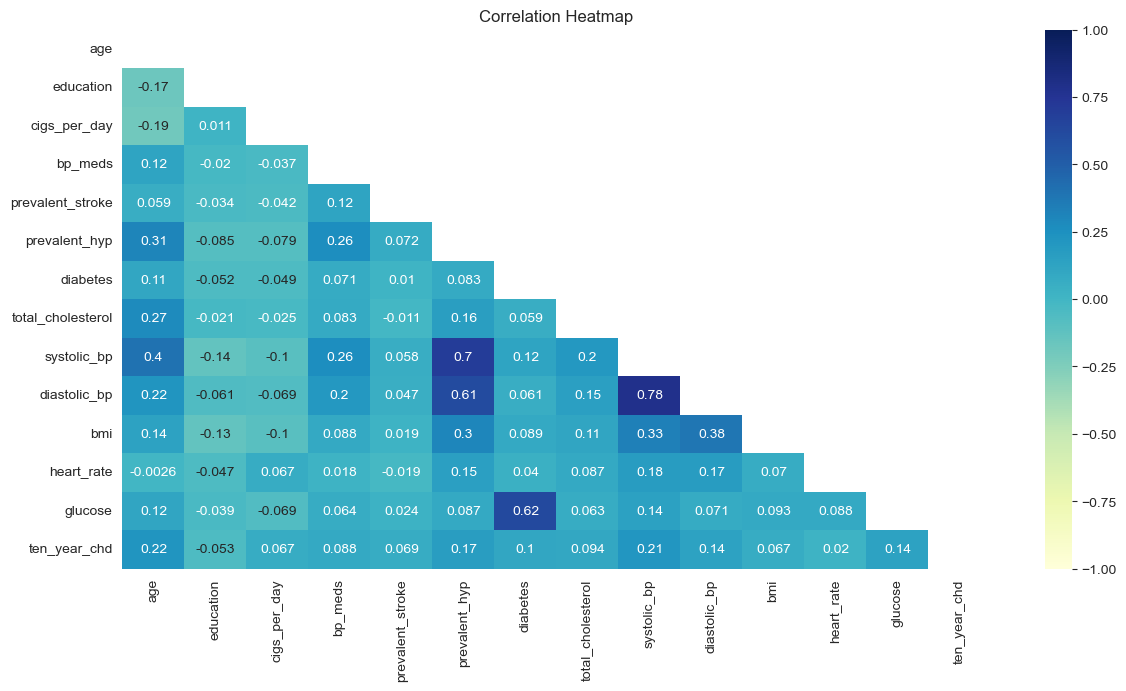

In [304]:

numeric_data = data_2.select_dtypes(include=[np.number])
corr = numeric_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 7))
    sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", ax=ax)
    plt.title('Correlation Heatmap')
    plt.show()


#### Chart - 10 : Pair Plot

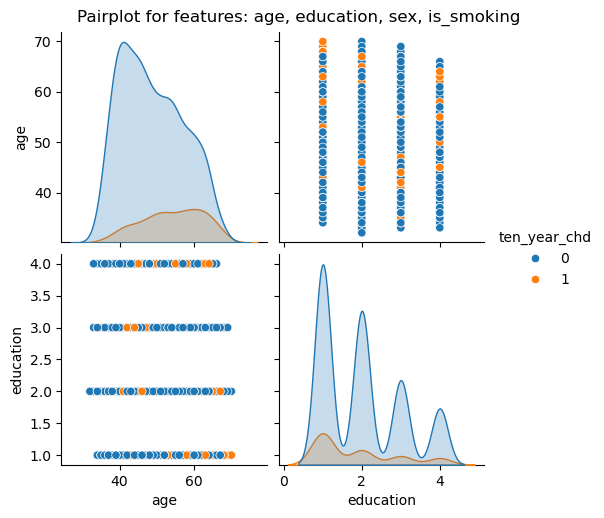

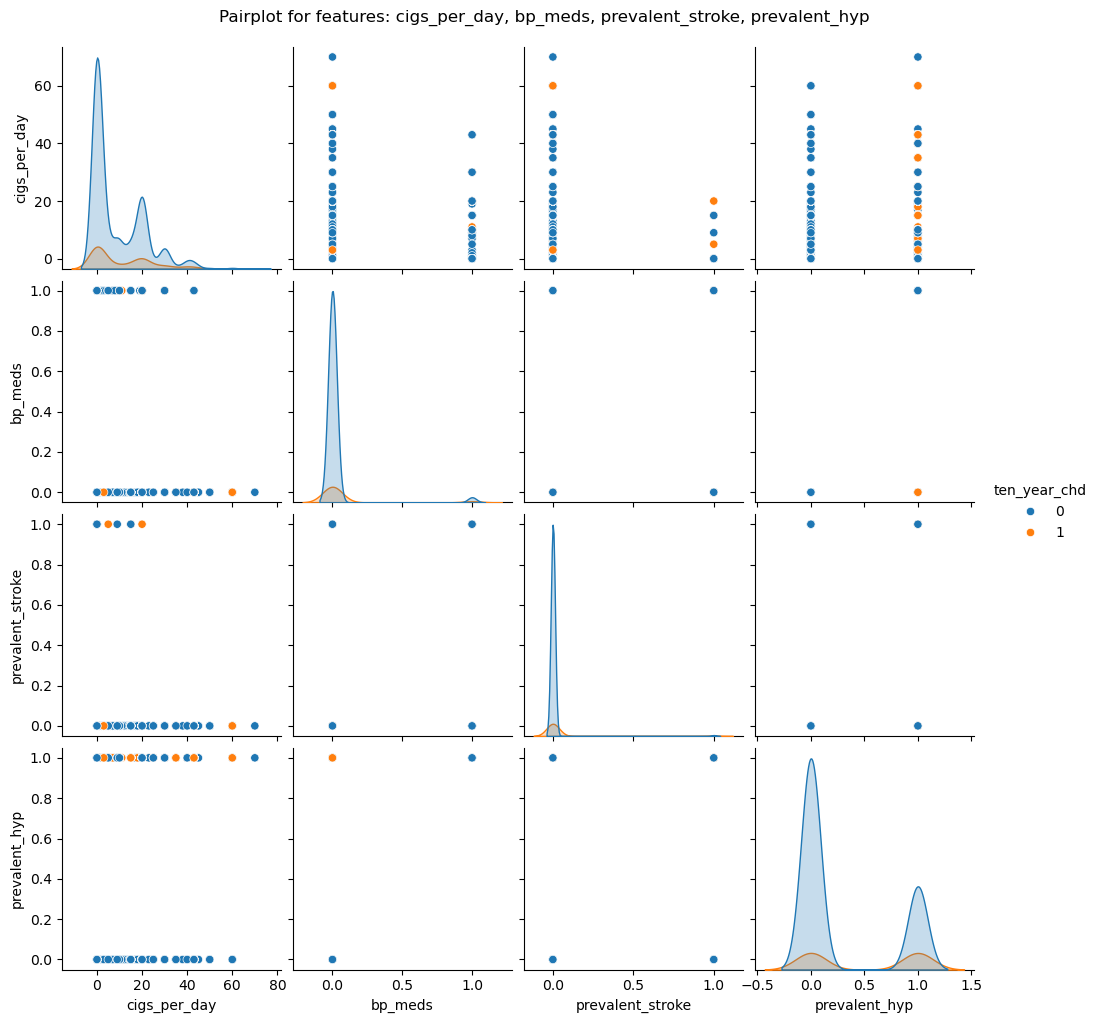

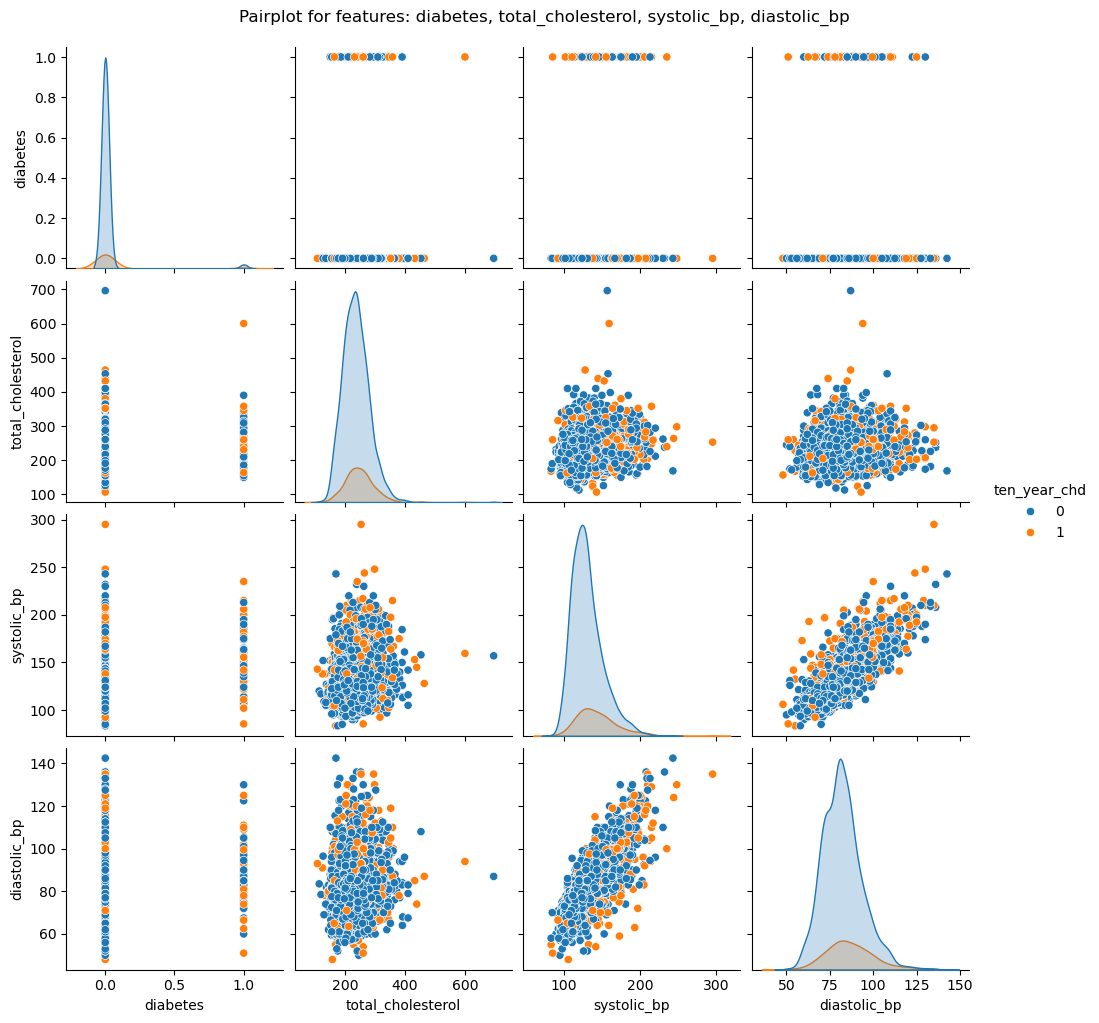

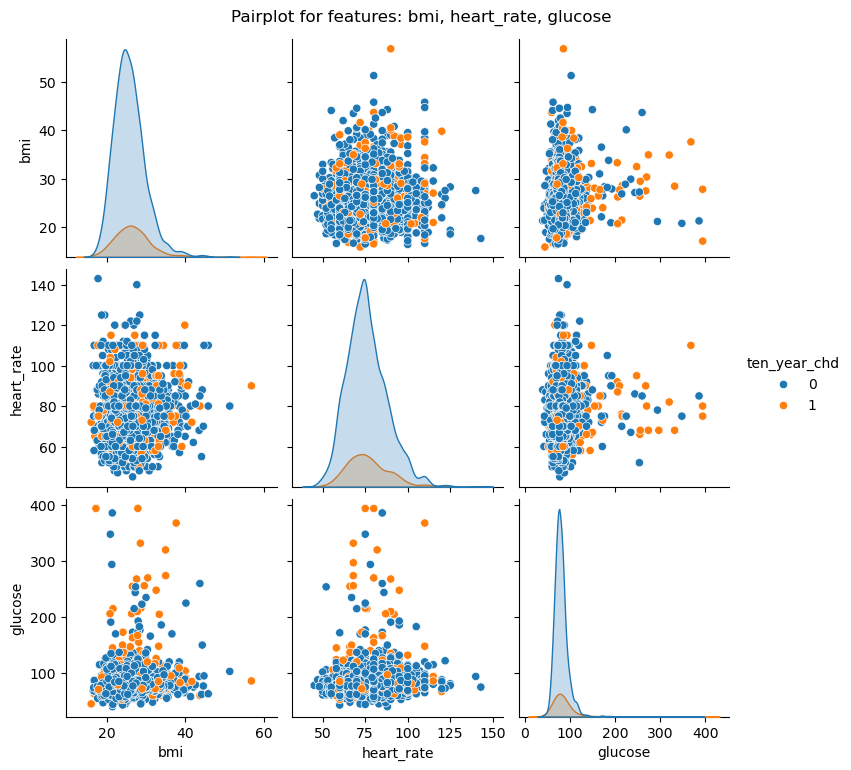

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

features_with_target = [
    'age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
    'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol', 
    'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd'
]

# Remove the target variable 'ten_year_chd' from features for pairplots
features_without_target = [feature for feature in features_with_target if feature != 'ten_year_chd']
def plot_pairplots(features, data, hue):

    for i in range(0, len(features), 4):
        subset_features = features[i:i + 4]
        subset_features_with_target = subset_features + [hue]
        
        # Generate the pairplot
        sns.pairplot(data[subset_features_with_target], hue=hue)
        plt.suptitle(f'Pairplot for features: {", ".join(subset_features)}', y=1.02)
        plt.show()

plot_pairplots(features_without_target, data_2, 'ten_year_chd')


## ***5. Hypothesis Testing***

#### 2. Perform an appropriate statistical test.

In [306]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data_2['education'], data_2['ten_year_chd'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'p-value: {p}')

ten_year_chd     0    1
education              
1.0           1135  256
2.0            872  118
3.0            479   70
4.0            319   54
p-value: 6.038646749234552e-05


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Education - Bp-meds (mode)

In [307]:
data_2['education'] = data_2['education'].fillna(data_2['education'].mode()[0])
data_2['bp_meds'] = data_2['bp_meds'].fillna(data_2['bp_meds'].mode()[0])

#### Cigs_per_day

In [308]:
data_2.cigs_per_day.mean().round(0),data_2.cigs_per_day.median()

(9.0, 0.0)

In [309]:
data_2[data_2['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


It is observed that the missing value of the cigs per day for all entry has the 'is smoking' column as YES that is they smoke.

In [310]:
data_2[data_2['is_smoking']=='YES']['cigs_per_day'].mean(),data_2[data_2['is_smoking']=='YES']['cigs_per_day'].median()

(18.345945945945946, 20.0)

In [311]:
data_2['cigs_per_day'] = data_2['cigs_per_day'].fillna(data_2[data_2['is_smoking']=='YES']['cigs_per_day'].median())

In [312]:
data_2[(data_2['is_smoking']=='NO') & (data_2['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


In [313]:
data_2[(data_2['is_smoking']=='YES') & (data_2['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


#### Cholesterol - BMI - Heartrate

In [314]:
data_2.total_cholesterol.mean(),data_2.total_cholesterol.median()

(237.07428400954655, 234.0)

In [315]:
data_2.bmi.mean(),data_2.bmi.median()

(25.7949644549763, 25.38)

In [316]:
data_2.heart_rate.mean(),data_2.heart_rate.median()

(75.97727943346119, 75.0)

In [317]:
data_2['total_cholesterol'] = data_2['total_cholesterol'].fillna(data_2['total_cholesterol'].median())
data_2['bmi'] = data_2['bmi'].fillna(data_2['bmi'].median())
data_2['heart_rate'] = data_2['heart_rate'].fillna(data_2['heart_rate'].median())

In [318]:
data_2.total_cholesterol.mean(),data_2.total_cholesterol.median()

(237.03982300884957, 234.0)

In [319]:

data_2.bmi.mean(),data_2.bmi.median()

(25.793250737463126, 25.38)

In [320]:

data_2.heart_rate.mean(),data_2.heart_rate.median()

(75.97699115044247, 75.0)

#### Glucose

In [321]:
data_2.glucose.isna().sum()

304

In [322]:
data_2.glucose.mean(),data_2.glucose.median(),data_2.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [323]:
data_2['sex'] = np.where(data_2['sex'] == 'M',1,0)
data_2['is_smoking'] = np.where(data_2['is_smoking'] == 'YES',1,0)

In [324]:
data_2 = data_2.astype({'age': int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [325]:
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(data_2)
data_2 = pd.DataFrame(imputed, columns=data_2.columns)

In [326]:
data_2.glucose.mean(),data_2.glucose.median(),data_2.glucose.mode()

(82.04327433628319,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [327]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

In [328]:
data_2.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

###  Handling Outliers

In [329]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [330]:
for col in continuous_var:
  # Using IQR method to define the range of inliners:
  q1, q3, median = data_2[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit,np.where(
                         data_2[col] < lower_limit,lower_limit,data_2[col]))

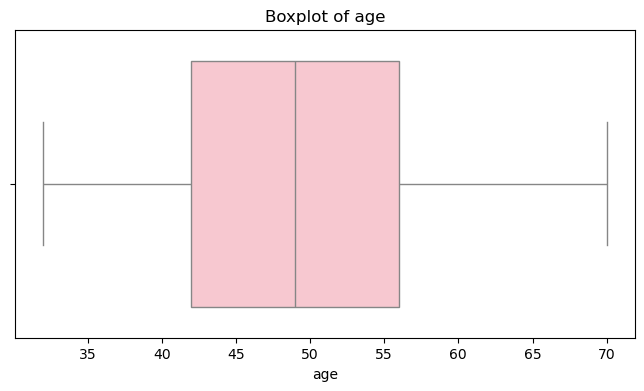

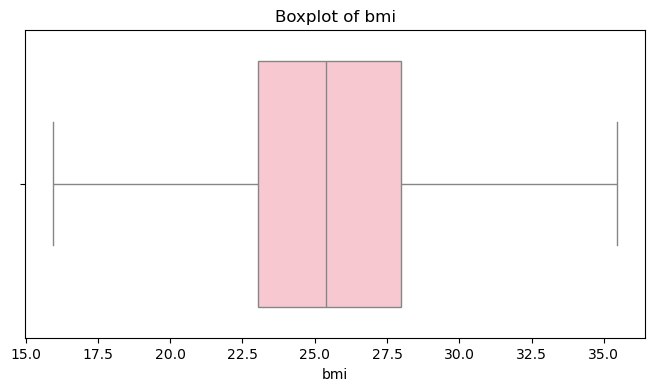

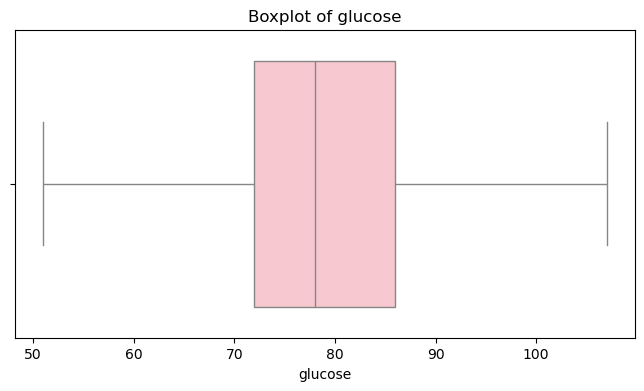

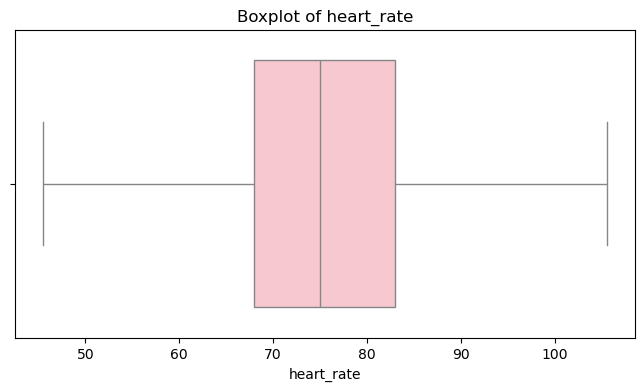

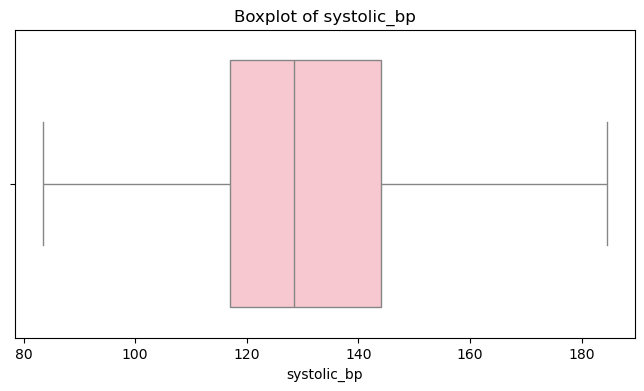

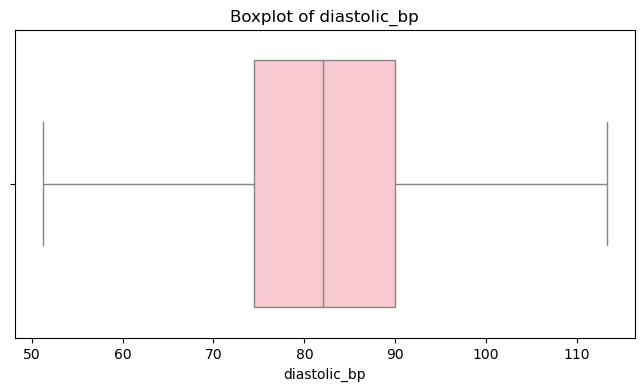

In [331]:
numerical_features = ['age', 'bmi', 'glucose', 'heart_rate', 'systolic_bp', 'diastolic_bp']


for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_2[feature], color='pink')
    plt.title(f'Boxplot of {feature}')
    plt.show()


###  Categorical Encoding

In [332]:
data_2 = pd.get_dummies(data_2, columns=['education'])

###  Data Scaling

In [333]:
scaler = StandardScaler()
features = [i for i in data_2.columns if i not in ['ten_year_chd']]

In [334]:
features

['age',
 'sex',
 'is_smoking',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose',
 'education_1.0',
 'education_2.0',
 'education_3.0',
 'education_4.0']

In [335]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [336]:
data_2[continuous_var] = scaler.fit_transform(data_2[continuous_var])

In [337]:
X = data_2.drop('ten_year_chd',axis=1)
y = data_2['ten_year_chd']

###  Data Splitting

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

In [339]:
y_train.value_counts()

ten_year_chd
0.0    2303
1.0     409
Name: count, dtype: int64

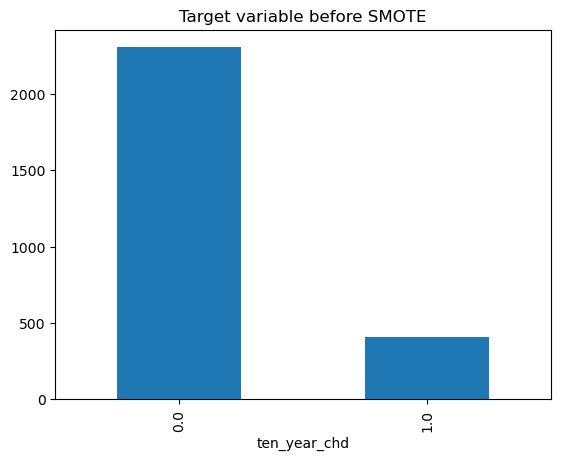

In [340]:
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')
plt.show()

In [341]:
X_smote, y_smote = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))

Samples in the original dataset:  2712
Samples in the resampled dataset:  4594


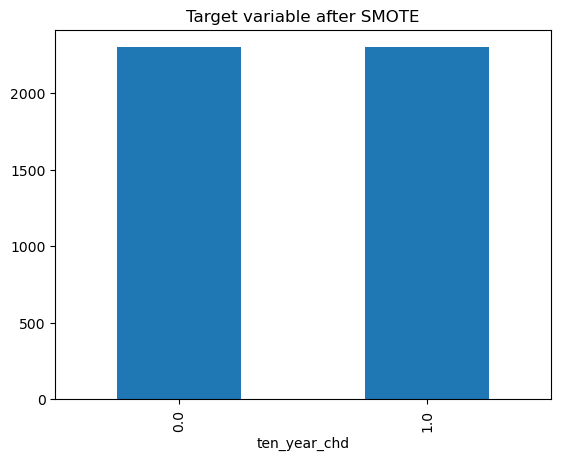

In [342]:
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')
plt.show()

## ***7. ML Model Implementation***

In [343]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_train, X_test, y_train, y_test, regression=False):
    '''
    This function evaluates a model by fitting it, making predictions, and calculating several metrics.
    It can work for both classification and regression models.
    
    Parameters:
    model: The machine learning model to evaluate.
    X_train: The training features.
    X_test: The testing features.
    y_train: The training labels.
    y_test: The testing labels.
    regression: Boolean indicating whether the task is a regression task (default is False for classification).
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Regression metrics
    if regression:
        print("\nRegression Metrics:")
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        print(f'MAE (Train): {mae_train:.4f}')
        print(f'MAE (Test): {mae_test:.4f}')
        
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        print(f'MSE (Train): {mse_train:.4f}')
        print(f'MSE (Test): {mse_test:.4f}')
        
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        print(f'R² (Train): {r2_train:.4f}')
        print(f'R² (Test): {r2_test:.4f}')
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        print(f'Cross-Validation Score (5-fold, MSE): {-cv_scores.mean():.4f}')
        
        return [mae_train, mae_test, mse_train, mse_test, r2_train, r2_test, -cv_scores.mean()]

    # Classification metrics
    else:
        pred_prob_train = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else None
        pred_prob_test = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # calculate ROC AUC score
        roc_auc_train = roc_auc_score(y_train, pred_prob_train) if pred_prob_train is not None else 'N/A'
        roc_auc_test = roc_auc_score(y_test, pred_prob_test) if pred_prob_test is not None else 'N/A'
        print("\nTrain ROC AUC:", roc_auc_train)
        print("Test ROC AUC:", roc_auc_test)

        # plot the ROC curve if available
        if pred_prob_train is not None and pred_prob_test is not None:
            fpr_train, tpr_train, _ = roc_curve(y_train, pred_prob_train)
            fpr_test, tpr_test, _ = roc_curve(y_test, pred_prob_test)
            plt.plot([0,1],[0,1],'k--')
            plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
            plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
            plt.legend()
            plt.title("ROC Curve")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.show()

        # calculate confusion matrix
        cm_train = confusion_matrix(y_train, y_pred_train)
        cm_test = confusion_matrix(y_test, y_pred_test)
        fig, ax = plt.subplots(1, 2, figsize=(11,4))

        print("\nConfusion Matrix:")
        sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
        ax[0].set_xlabel("Predicted Label")
        ax[0].set_ylabel("True Label")
        ax[0].set_title("Train Confusion Matrix")

        sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
        ax[1].set_xlabel("Predicted Label")
        ax[1].set_ylabel("True Label")
        ax[1].set_title("Test Confusion Matrix")
        plt.tight_layout()
        plt.show()

        # calculate classification report
        cr_train = classification_report(y_train, y_pred_train, output_dict=True)
        cr_test = classification_report(y_test, y_pred_test, output_dict=True)
        print("\nTrain Classification Report:")
        print(pd.DataFrame(cr_train).T.to_markdown())
        print("\nTest Classification Report:")
        print(pd.DataFrame(cr_test).T.to_markdown())

        # calculate metrics
        precision_train = cr_train['weighted avg']['precision']
        precision_test = cr_test['weighted avg']['precision']
        recall_train = cr_train['weighted avg']['recall']
        recall_test = cr_test['weighted avg']['recall']
        acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
        acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
        F1_train = cr_train['weighted avg']['f1-score']
        F1_test = cr_test['weighted avg']['f1-score']

        return [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test]


In [344]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1 : Logistic regression

In [345]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

#### performance using Evaluation metric Score Chart.


Train ROC AUC: 0.8137808794155046
Test ROC AUC: 0.7245029956427015


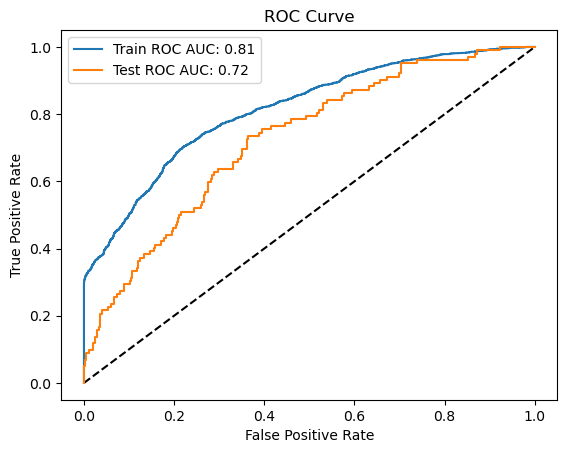


Confusion Matrix:


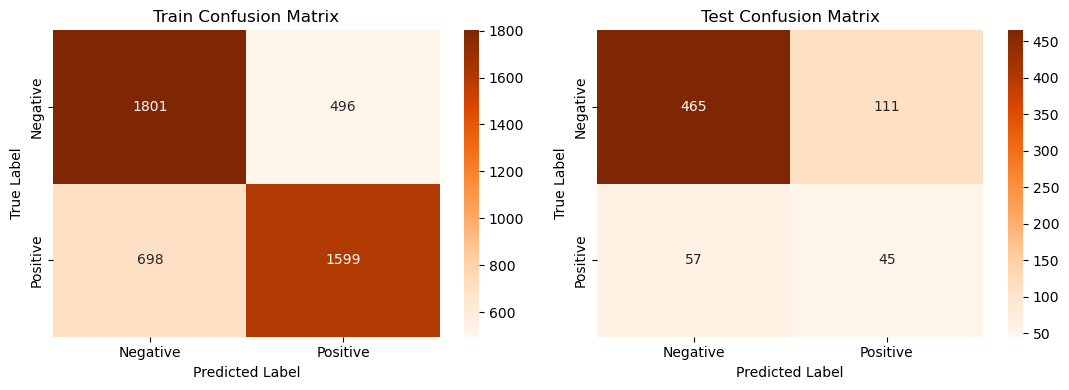


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.720688 | 0.784066 |   0.751043 | 2297        |
| 1.0          |    0.763246 | 0.696125 |   0.728142 | 2297        |
| accuracy     |    0.740096 | 0.740096 |   0.740096 |    0.740096 |
| macro avg    |    0.741967 | 0.740096 |   0.739592 | 4594        |
| weighted avg |    0.741967 | 0.740096 |   0.739592 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.890805 | 0.807292 |   0.846995 | 576        |
| 1.0          |    0.288462 | 0.441176 |   0.348837 | 102        |
| accuracy     |    0.752212 | 0.752212 |   0.752212 |   0.752212 |
| macro avg    |    0.589633 | 0.624234 |   0.597916 | 678        |
| weighted avg |    0.800187 | 0.752212 |   0.7720

In [346]:

lr_score = evaluate_model(lr_model, X_smote, X_test, y_smote, y_test)

In [347]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.741967
Precision Test,0.800187
Recall Train,0.740096
Recall Test,0.752212
Accuracy Train,0.740096
Accuracy Test,0.752212
ROC-AUC Train,0.813781
ROC-AUC Test,0.724503
F1 macro Train,0.739592
F1 macro Test,0.772051


### ML Model - 2 : Decision Tree

In [348]:
dt_model = DecisionTreeClassifier(random_state=20)

#### performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5334456699346406


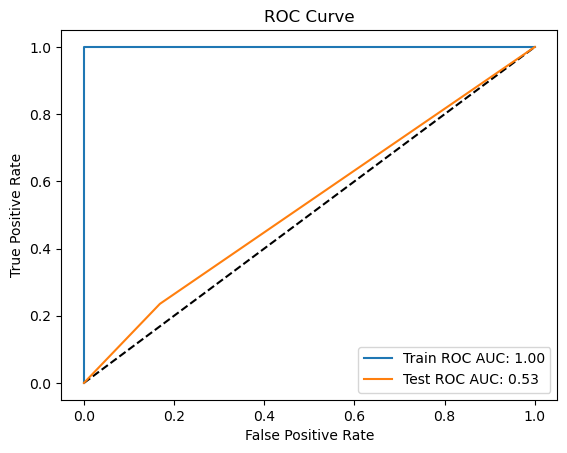


Confusion Matrix:


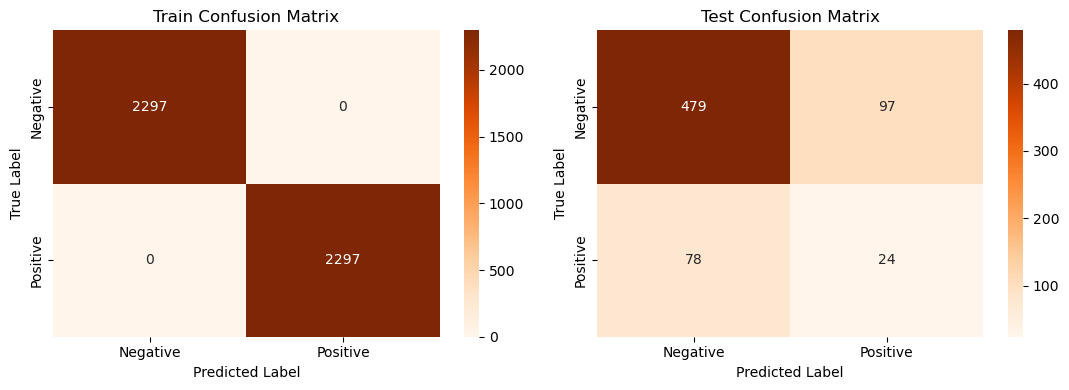


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2297 |
| 1.0          |           1 |        1 |          1 |      2297 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4594 |
| weighted avg |           1 |        1 |          1 |      4594 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.859964 | 0.831597 |   0.845543 | 576        |
| 1.0          |    0.198347 | 0.235294 |   0.215247 | 102        |
| accuracy     |    0.741888 | 0.741888 |   0.741888 |   0.741888 |
| macro avg    |    0.529156 | 0.533446 |   0.530395 | 678        |
| weighted avg |    0.760429 | 0.741888 |   0.750719 | 678      

In [349]:
dt_score = evaluate_model(dt_model, X_smote, X_test, y_smote, y_test)

In [350]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Decision Tree
Precision Train,0.741967,1.000000
Precision Test,0.800187,0.760429
Recall Train,0.740096,1.000000
Recall Test,0.752212,0.741888
Accuracy Train,0.740096,1.000000
Accuracy Test,0.752212,0.741888
ROC-AUC Train,0.813781,1.000000
ROC-AUC Test,0.724503,0.533446
F1 macro Train,0.739592,1.000000
F1 macro Test,0.772051,0.750719


### ML Model - 3 : Random Forest

In [351]:
rf_model = RandomForestClassifier(random_state=0)

#### performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.6897552423747276


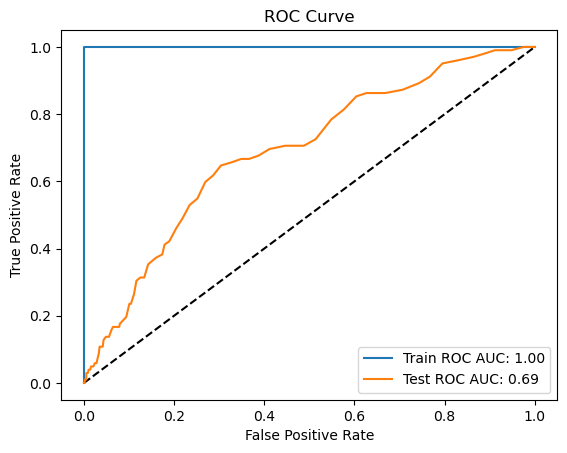


Confusion Matrix:


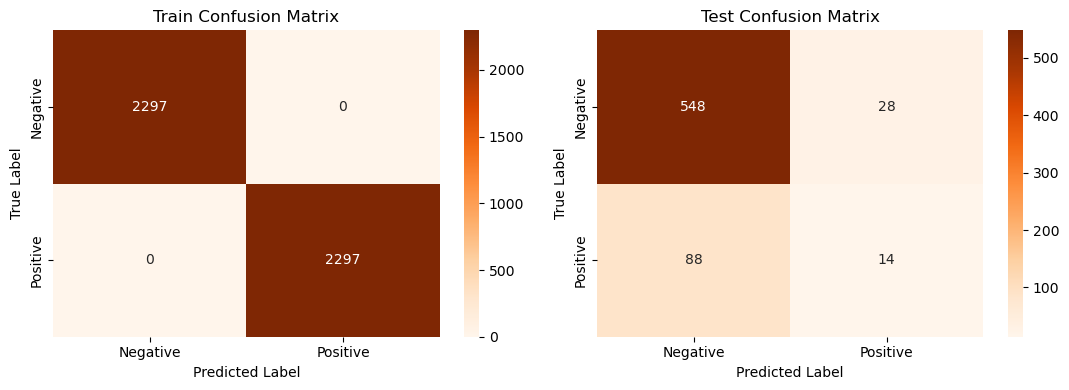


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2297 |
| 1.0          |           1 |        1 |          1 |      2297 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4594 |
| weighted avg |           1 |        1 |          1 |      4594 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.861635 | 0.951389 |   0.90429  | 576        |
| 1.0          |    0.333333 | 0.137255 |   0.194444 | 102        |
| accuracy     |    0.828909 | 0.828909 |   0.828909 |   0.828909 |
| macro avg    |    0.597484 | 0.544322 |   0.549367 | 678        |
| weighted avg |    0.782156 | 0.828909 |   0.797499 | 678      

In [352]:
rf_score = evaluate_model(rf_model, X_smote, X_test, y_smote, y_test)

In [353]:
score['Random Forest'] = rf_score
score

,Logistic regression,Decision Tree,Random Forest
Precision Train,0.741967,1.000000,1.000000
Precision Test,0.800187,0.760429,0.782156
Recall Train,0.740096,1.000000,1.000000
Recall Test,0.752212,0.741888,0.828909
Accuracy Train,0.740096,1.000000,1.000000
Accuracy Test,0.752212,0.741888,0.828909
ROC-AUC Train,0.813781,1.000000,1.000000
ROC-AUC Test,0.724503,0.533446,0.689755
F1 macro Train,0.739592,1.000000,1.000000
F1 macro Test,0.772051,0.750719,0.797499


### ML Model - 4 : SVM (Support Vector Machine)

In [354]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)

#### performance using Evaluation metric Score Chart.


Train ROC AUC: 0.8112330273497506
Test ROC AUC: 0.7217286220043573


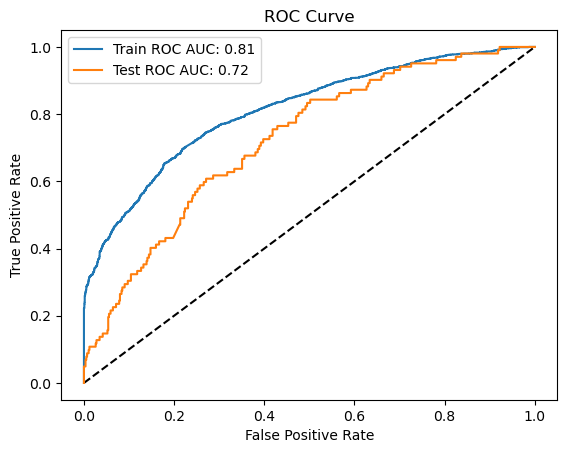


Confusion Matrix:


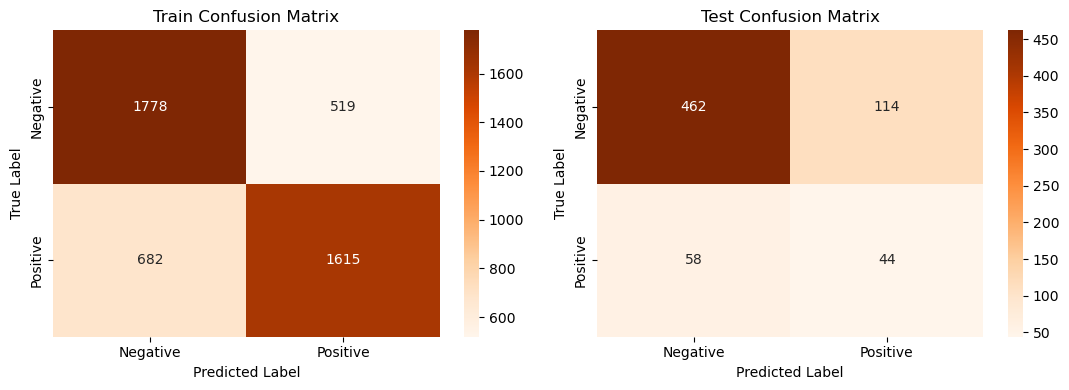


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.722764 | 0.774053 |   0.74753  | 2297        |
| 1.0          |    0.756795 | 0.703091 |   0.728955 | 2297        |
| accuracy     |    0.738572 | 0.738572 |   0.738572 |    0.738572 |
| macro avg    |    0.739779 | 0.738572 |   0.738243 | 4594        |
| weighted avg |    0.739779 | 0.738572 |   0.738243 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.888462 | 0.802083 |   0.843066 | 576        |
| 1.0          |    0.278481 | 0.431373 |   0.338462 | 102        |
| accuracy     |    0.746313 | 0.746313 |   0.746313 |   0.746313 |
| macro avg    |    0.583471 | 0.616728 |   0.590764 | 678        |
| weighted avg |    0.796695 | 0.746313 |   0.7671

In [355]:
svm_score = evaluate_model(svm_model, X_smote, X_test, y_smote, y_test)

In [356]:
score['SVM'] = svm_score
score

,Logistic regression,Decision Tree,Random Forest,SVM
Precision Train,0.741967,1.000000,1.000000,0.739779
Precision Test,0.800187,0.760429,0.782156,0.796695
Recall Train,0.740096,1.000000,1.000000,0.738572
Recall Test,0.752212,0.741888,0.828909,0.746313
Accuracy Train,0.740096,1.000000,1.000000,0.738572
Accuracy Test,0.752212,0.741888,0.828909,0.746313
ROC-AUC Train,0.813781,1.000000,1.000000,0.811233
ROC-AUC Test,0.724503,0.533446,0.689755,0.721729
F1 macro Train,0.739592,1.000000,1.000000,0.738243
F1 macro Test,0.772051,0.750719,0.797499,0.767152


### ML Model - 5 : Naive Bayes

In [357]:
nb_model = GaussianNB()

#### performance using Evaluation metric Score Chart.


Train ROC AUC: 0.7190333059209748
Test ROC AUC: 0.7188436138344227


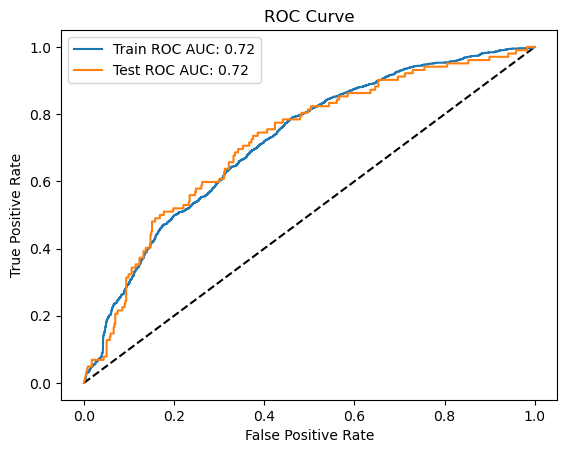


Confusion Matrix:


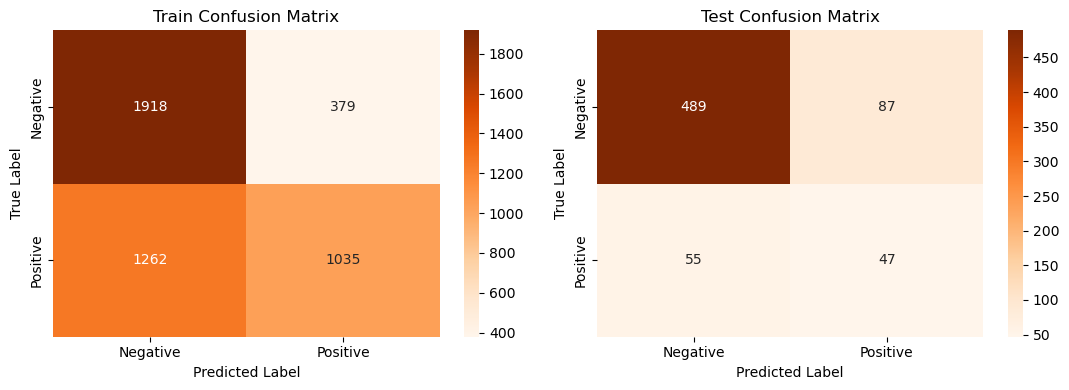


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.603145 | 0.835002 |   0.700383 | 2297        |
| 1.0          |    0.731966 | 0.450588 |   0.557801 | 2297        |
| accuracy     |    0.642795 | 0.642795 |   0.642795 |    0.642795 |
| macro avg    |    0.667555 | 0.642795 |   0.629092 | 4594        |
| weighted avg |    0.667555 | 0.642795 |   0.629092 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.898897 | 0.848958 |   0.873214 | 576       |
| 1.0          |    0.350746 | 0.460784 |   0.398305 | 102       |
| accuracy     |    0.79056  | 0.79056  |   0.79056  |   0.79056 |
| macro avg    |    0.624822 | 0.654871 |   0.63576  | 678       |
| weighted avg |    0.816432 | 0.79056  |   0.801768 | 6

In [358]:
nb_score = evaluate_model(nb_model, X_smote, X_test, y_smote, y_test)

In [359]:
score['Naive Bayes'] = nb_score
score

,Logistic regression,Decision Tree,Random Forest,SVM,Naive Bayes
Precision Train,0.741967,1.000000,1.000000,0.739779,0.667555
Precision Test,0.800187,0.760429,0.782156,0.796695,0.816432
Recall Train,0.740096,1.000000,1.000000,0.738572,0.642795
Recall Test,0.752212,0.741888,0.828909,0.746313,0.790560
Accuracy Train,0.740096,1.000000,1.000000,0.738572,0.642795
Accuracy Test,0.752212,0.741888,0.828909,0.746313,0.790560
ROC-AUC Train,0.813781,1.000000,1.000000,0.811233,0.719033
ROC-AUC Test,0.724503,0.533446,0.689755,0.721729,0.718844
F1 macro Train,0.739592,1.000000,1.000000,0.738243,0.629092
F1 macro Test,0.772051,0.750719,0.797499,0.767152,0.801768


## Plot of scores for models

### Precision

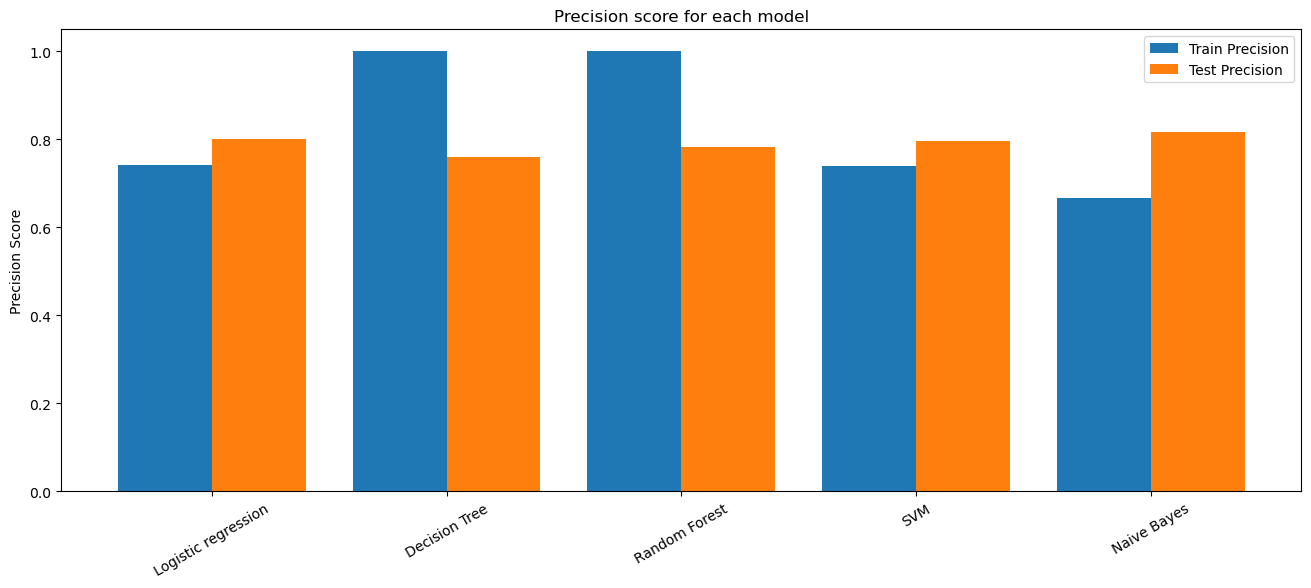

In [360]:

models = list(score.columns)
train = score.iloc[0,:]
test = score.iloc[1,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Precision')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Precision')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Precision Score")
plt.title("Precision score for each model")
plt.legend()
plt.show()

### Recall

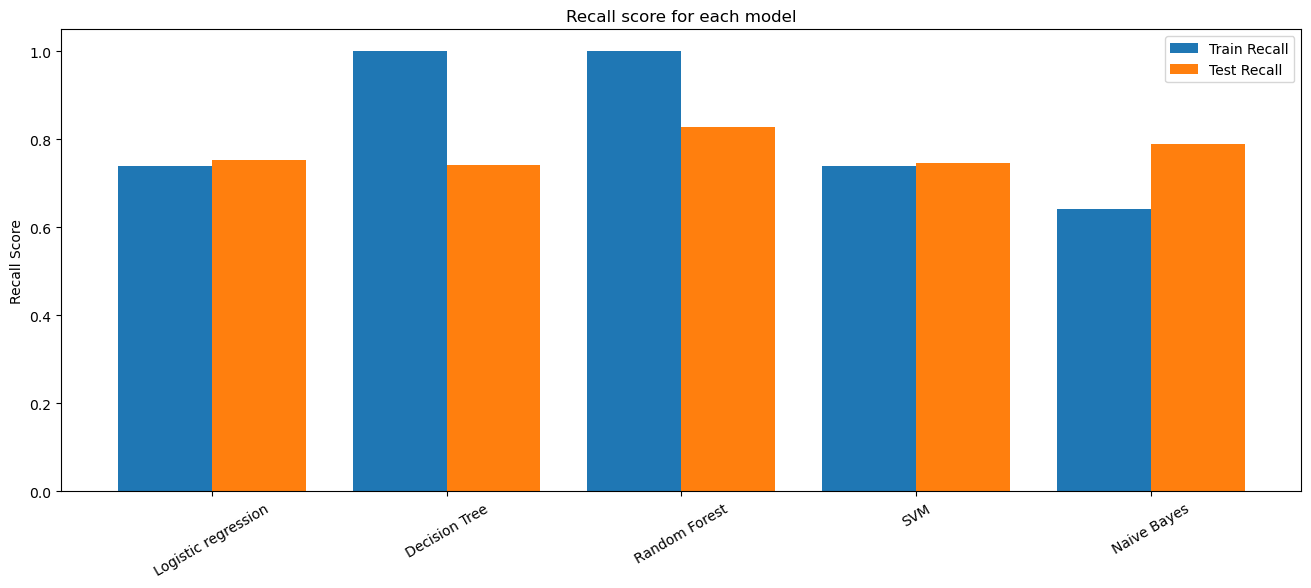

In [361]:
models = list(score.columns)
train = score.iloc[2,:]
test = score.iloc[3,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')

# Set labels
plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Recall Score")
plt.title("Recall score for each model")
plt.legend()
plt.show()

### Accuracy

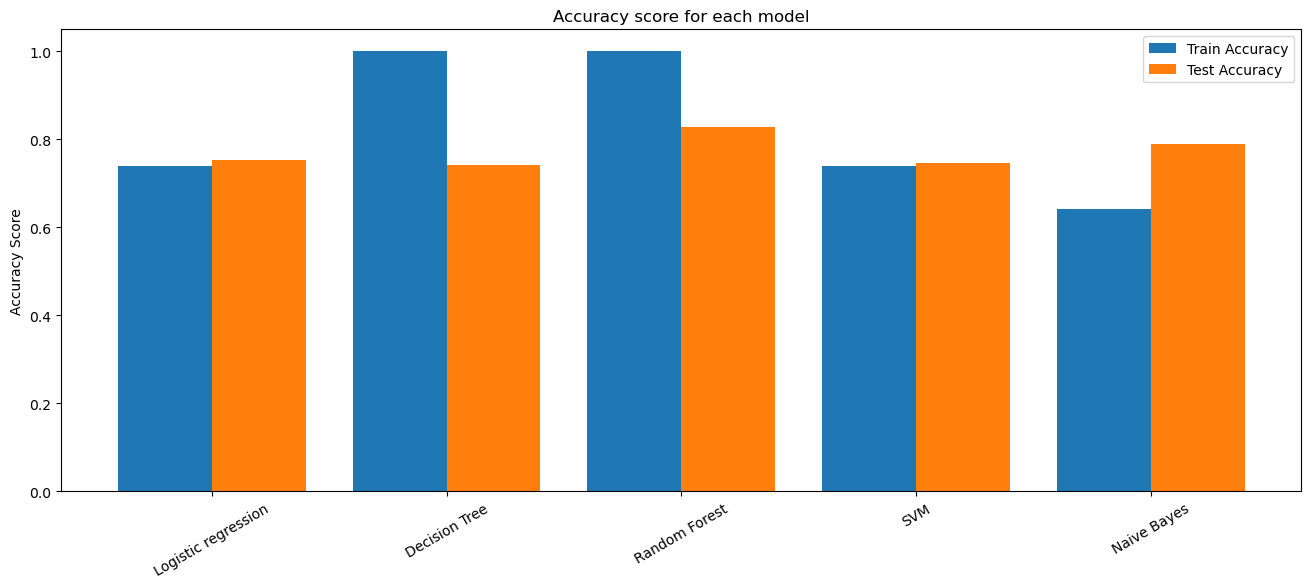

In [362]:
models = list(score.columns)
train = score.iloc[4,:]
test = score.iloc[5,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Accuracy')

plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Accuracy Score")
plt.title("Accuracy score for each model")
plt.legend()
plt.show()

### ROC-AUC

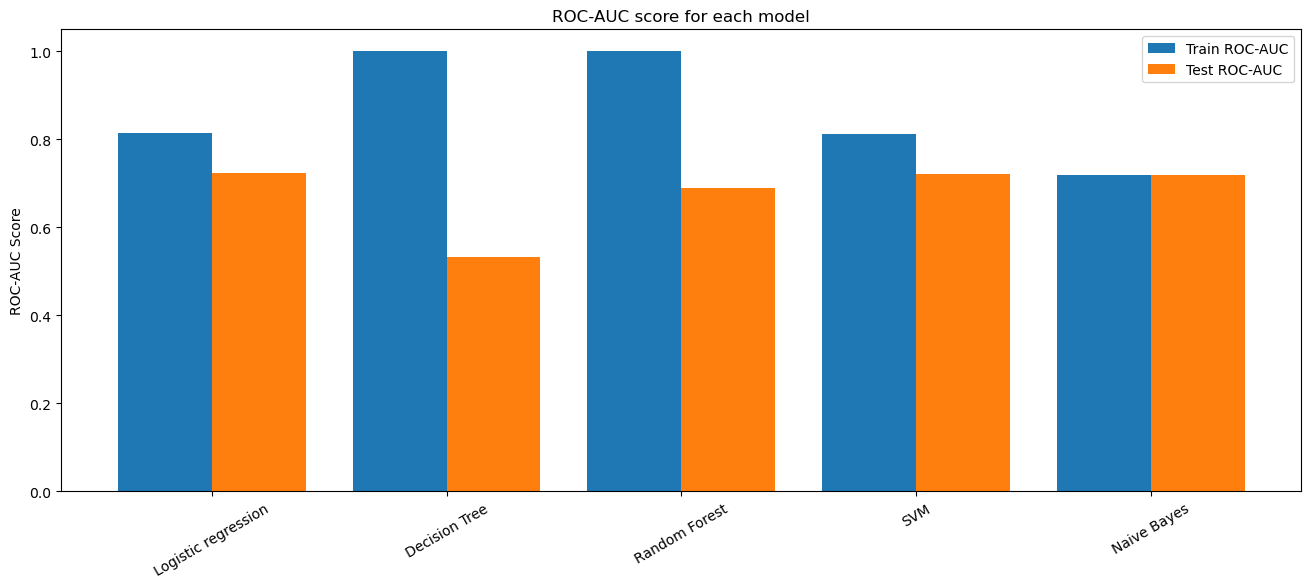

In [363]:
models = list(score.columns)
train = score.iloc[6,:]
test = score.iloc[7,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train ROC-AUC')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test ROC-AUC')

plt.xticks(X_axis,models, rotation=30)
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC score for each model")
plt.legend()
plt.show()

### F1 score

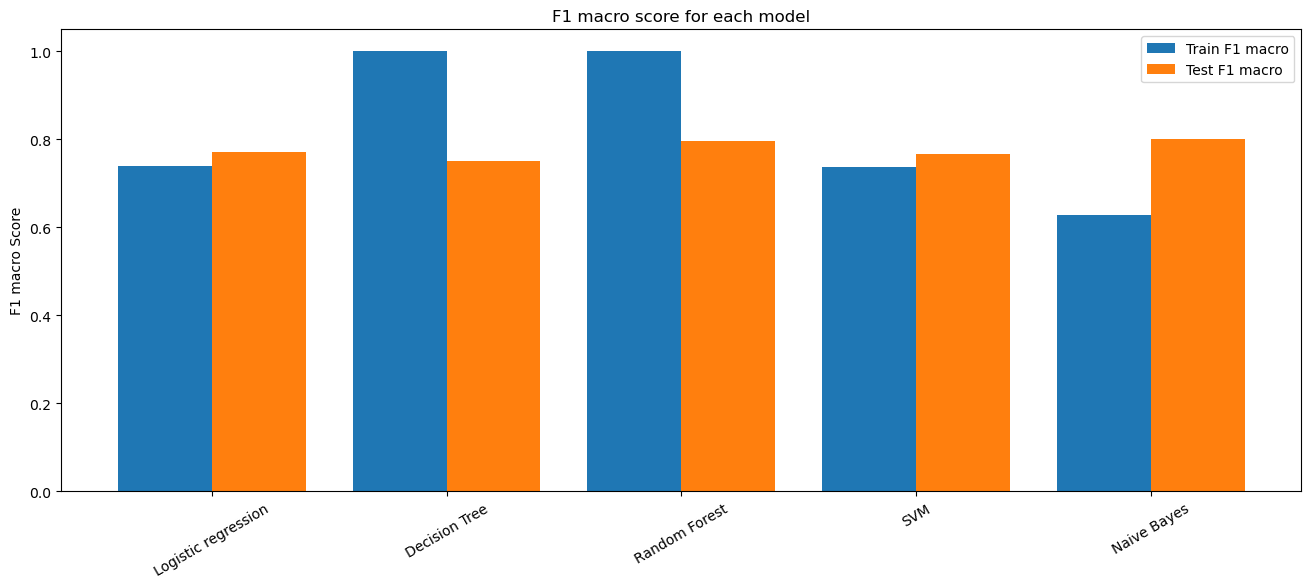

In [364]:
models = list(score.columns)
train = score.iloc[8,:]
test = score.iloc[9,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(16,6))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train F1 macro')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test F1 macro')

plt.xticks(X_axis,models, rotation=30)
plt.ylabel("F1 macro Score")
plt.title("F1 macro score for each model")
plt.legend()
plt.show()

## ***Selection of best model***

In [365]:
score

,Logistic regression,Decision Tree,Random Forest,SVM,Naive Bayes
Precision Train,0.741967,1.000000,1.000000,0.739779,0.667555
Precision Test,0.800187,0.760429,0.782156,0.796695,0.816432
Recall Train,0.740096,1.000000,1.000000,0.738572,0.642795
Recall Test,0.752212,0.741888,0.828909,0.746313,0.790560
Accuracy Train,0.740096,1.000000,1.000000,0.738572,0.642795
Accuracy Test,0.752212,0.741888,0.828909,0.746313,0.790560
ROC-AUC Train,0.813781,1.000000,1.000000,0.811233,0.719033
ROC-AUC Test,0.724503,0.533446,0.689755,0.721729,0.718844
F1 macro Train,0.739592,1.000000,1.000000,0.738243,0.629092
F1 macro Test,0.772051,0.750719,0.797499,0.767152,0.801768


In [366]:

score_t = score.transpose()            
remove_models = score_t[score_t['Recall Train']>=0.95].index  
remove_models

adj = score_t.drop(remove_models)                     
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,ROC-AUC Train,ROC-AUC Test,F1 macro Train,F1 macro Test
Logistic regression,0.741967,0.800187,0.740096,0.752212,0.740096,0.752212,0.813781,0.724503,0.739592,0.772051
SVM,0.739779,0.796695,0.738572,0.746313,0.738572,0.746313,0.811233,0.721729,0.738243,0.767152
Naive Bayes,0.667555,0.816432,0.642795,0.790560,0.642795,0.790560,0.719033,0.718844,0.629092,0.801768


In [157]:
# Import pickle
import pickle

# Save the best model (Neural Network tuned)
pickle.dump(nn_model2, open('nn_model2.pkl', 'wb'))
# Save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))